<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:20px"><strong><PUC Minas - Pontif&iacute;cia Universidade Cat&oacute;lica de Minas Gerais><strong></span></p>

<p style="text-align:center"><span style="font-size:20px"><strong>P&oacute;s-Gradua&ccedil;&atilde;o em Ci&ecirc;ncia de Dados e Big Data</strong></span></p>

<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:20px"><strong>Trabalho de Conclus&atilde;o de Curso</strong></span></p>

<p style="text-align:center">&nbsp;</p>

<p style="text-align:center"><span style="font-size:16px"><strong>T&iacute;tulo</strong></span><span style="font-size:14px">: AGRUPAMENTO DE CLIENTES POR SIMILARIDADE COM ALGORITMO DE APRENDIZADO.</span></p>

<p style="text-align:center"><span style="font-size:16px"><strong>Aluno</strong></span><span style="font-size:14px">: André Eugenio Neto</span></p><p>




<p><span style="font-size:14px">Os datasets utilizados neste trabalho foram obtidos diretamente do sistema de gestão da operadora de saúde em questão.</span></p><p>


In [110]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist

#Para substituir categóricos em númericos
from sklearn.preprocessing import LabelEncoder


<h1> Importação dos Datasets e Visualização de dados </h1>
Nesta seção iremos realizar a importação do datasets e faremos uma breve visualização dos dados

## Dataset beneficiarios.csv

In [111]:
#Aqui é realizado a importação do dataset para análise
df_beneficiario = pd.read_csv('beneficiarios.csv',sep=';')

In [112]:
#Verificando a quantidade de linhas e colunas do dataset e visualisando em tela
print("Quantidade de Linhas =",df_beneficiario.shape[0])
print("Quantidade de Colunas =",df_beneficiario.shape[1])

Quantidade de Linhas = 34588
Quantidade de Colunas = 8


In [113]:
#visualizando as 5 primeiras linhas do dataset
df_beneficiario.head()

,id_beneficiario,inclusao,exclusao,tipo_dependencia,faixa_etaria,sexo,tipo_contratacao,coparticipacao
0,1000001,01/03/2004,01/01/2019,Titular,59 ou mais,M,B,Não
1,1000002,01/03/2004,NaN,Dependente,59 ou mais,F,B,Não
2,1000003,01/03/2004,NaN,Titular,59 ou mais,F,B,Não
3,1000004,01/03/2004,NaN,Titular,59 ou mais,M,B,Não
4,1000005,01/03/2004,NaN,Dependente,59 ou mais,F,B,Não


In [114]:
#visualizando as 5 ultimas linhas do dataset
df_beneficiario.tail()

,id_beneficiario,inclusao,exclusao,tipo_dependencia,faixa_etaria,sexo,tipo_contratacao,coparticipacao
34583,1034584,01/01/2023,NaN,Dependente,0 a 18 anos,F,A,Sim
34584,1034585,01/07/2022,31/08/2022,Titular,34 a 38 anos,F,A,Sim
34585,1034586,01/07/2022,31/08/2022,Dependente,34 a 38 anos,M,A,Sim
34586,1034587,01/07/2022,31/08/2022,Dependente,0 a 18 anos,M,A,Sim
34587,1034588,01/07/2022,31/08/2022,Dependente,0 a 18 anos,F,A,Sim


In [115]:
#visualizando os tipos dos dados
df_beneficiario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34588 entries, 0 to 34587
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_beneficiario   34588 non-null  int64 
 1   inclusao          34588 non-null  object
 2   exclusao          17865 non-null  object
 3   tipo_dependencia  34588 non-null  object
 4   faixa_etaria      34588 non-null  object
 5   sexo              34588 non-null  object
 6   tipo_contratacao  34588 non-null  object
 7   coparticipacao    34588 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [116]:
#verificando a existencia de campos nulos
df_beneficiario.isnull().sum()

id_beneficiario         0
inclusao                0
exclusao            16723
tipo_dependencia        0
faixa_etaria            0
sexo                    0
tipo_contratacao        0
coparticipacao          0
dtype: int64

No caso acima verificou-se 16723 valores nulos para a coluna exclusao. Isso se deve ao fato que de que existem clientes que não foram excluídos e por isso podemos deixar os campos em nulo no dataset.

In [117]:
#Verificando os atributos com valores únicos no dataset

df_beneficiario.nunique()

id_beneficiario     34588
inclusao             3254
exclusao             1225
tipo_dependencia        2
faixa_etaria           10
sexo                    2
tipo_contratacao        3
coparticipacao          2
dtype: int64

Aqui podemos observar que no dataset beneficiarios.csv os codigos de id_beneficiario são únicos e não possuem dados repetidos, pois o arquivo possui 34.588 linhas e 34.588 atributos únicos em id_beneficiario.

In [118]:
#Verificando se existem valores duplicados
df_beneficiario.duplicated().values.any()

False

## Dataset utilizacao.csv

In [119]:
# Carregando os dados do dataset utilizacao.csv
df_utilizacao = pd.read_csv('utilizacao.csv',sep=';')

In [120]:
#Verificando a quantidade de linhas e colunas do dataset e visualisando em tela
print("Quantidade de Linhas =",df_utilizacao .shape[0])
print("Quantidade de Colunas =",df_utilizacao .shape[1])

Quantidade de Linhas = 43398
Quantidade de Colunas = 3


In [121]:
#visualizando as 5 primeiras linhas do dataset
df_utilizacao.head()

,id_beneficiario,tipo_atendimento,valor_pago
0,1000002,Consultas,1750.00
1,1000002,Exames,15762.60
2,1000002,Internacao,4843.34
3,1000002,Pronto Socorro,737.65
4,1000003,Consultas,1630.00


In [122]:
#visualizando as 5 ultimas linhas do dataset
df_utilizacao.tail()

,id_beneficiario,tipo_atendimento,valor_pago
43393,1034585,Exames,615.15
43394,1034587,Consultas,436.09
43395,1034587,Exames,32.55
43396,1034587,Pronto Socorro,142.21
43397,1034588,Consultas,130.00


In [123]:
#visualizando os tipos dos dados
df_utilizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43398 entries, 0 to 43397
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_beneficiario   43398 non-null  int64  
 1   tipo_atendimento  43398 non-null  object 
 2   valor_pago        43398 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1017.3+ KB


In [124]:
#verificando a existencia de campos nulos
df_utilizacao.isnull().sum()

id_beneficiario     0
tipo_atendimento    0
valor_pago          0
dtype: int64

In [125]:
#Verificando os atributos com valores únicos no dataset

df_utilizacao.nunique()

id_beneficiario     16514
tipo_atendimento        5
valor_pago          21466
dtype: int64

In [126]:
#Verificando se existem valores duplicados
df_utilizacao.duplicated().values.any()

False

# Tratamento dos DataFrame

 DataFrame beneficiarios.csv

In [127]:
#Remover colunas desnecessárias
df_beneficiario = df_beneficiario.drop(columns=['inclusao','exclusao','tipo_contratacao','tipo_dependencia'])

In [128]:
# visualizar as Primeiras Linhas após a exclusão
df_beneficiario.head()

,id_beneficiario,faixa_etaria,sexo,coparticipacao
0,1000001,59 ou mais,M,Não
1,1000002,59 ou mais,F,Não
2,1000003,59 ou mais,F,Não
3,1000004,59 ou mais,M,Não
4,1000005,59 ou mais,F,Não


Unir os dois DataFrames

In [129]:
#Unindo os dois dataframe usando left join 

df_dados_merge = pd.merge(df_utilizacao,df_beneficiario, on='id_beneficiario', how='left')


In [130]:
# visualizar as Primeiras Linhas
df_dados_merge.head()

,id_beneficiario,tipo_atendimento,valor_pago,faixa_etaria,sexo,coparticipacao
0,1000002,Consultas,1750.00,59 ou mais,F,Não
1,1000002,Exames,15762.60,59 ou mais,F,Não
2,1000002,Internacao,4843.34,59 ou mais,F,Não
3,1000002,Pronto Socorro,737.65,59 ou mais,F,Não
4,1000003,Consultas,1630.00,59 ou mais,F,Não


In [131]:
#Verifica o tipo dos Campos
df_dados_merge.dtypes

id_beneficiario       int64
tipo_atendimento     object
valor_pago          float64
faixa_etaria         object
sexo                 object
coparticipacao       object
dtype: object

In [132]:
#Informações Gerais do Dataset
df_dados_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43398 entries, 0 to 43397
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_beneficiario   43398 non-null  int64  
 1   tipo_atendimento  43398 non-null  object 
 2   valor_pago        43398 non-null  float64
 3   faixa_etaria      43398 non-null  object 
 4   sexo              43398 non-null  object 
 5   coparticipacao    43398 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [133]:
# Checando se há valores missing
df_dados_merge.isnull().values.any()

False

In [134]:
# Checando onde há valores missing
df_dados_merge.isnull().sum()

id_beneficiario     0
tipo_atendimento    0
valor_pago          0
faixa_etaria        0
sexo                0
coparticipacao      0
dtype: int64

In [135]:
#Dimensões do Dataset em linhas e colunas respectivamente
df_dados_merge.shape

(43398, 6)

In [136]:
#Verificando valores Únicos
df_dados_merge.nunique()

id_beneficiario     16514
tipo_atendimento        5
valor_pago          21466
faixa_etaria           10
sexo                    2
coparticipacao          2
dtype: int64

Ao unir os dataframe, verificou-se que a quantidade de linhas total é de 47165 e os valores únicas para o atributo id_beneficiario é de 16516. Sendo assim, constatou-se que os beneficiários estão repetindo em cada linha. Por isso vamos transpor o dataframe com base na transposição da coluna tipo_atendimento

Visualizaremos como o dataframe df_dados_merge está:

In [137]:
#Visualizando o dataframe
df_dados_merge.head()

,id_beneficiario,tipo_atendimento,valor_pago,faixa_etaria,sexo,coparticipacao
0,1000002,Consultas,1750.00,59 ou mais,F,Não
1,1000002,Exames,15762.60,59 ou mais,F,Não
2,1000002,Internacao,4843.34,59 ou mais,F,Não
3,1000002,Pronto Socorro,737.65,59 ou mais,F,Não
4,1000003,Consultas,1630.00,59 ou mais,F,Não


In [138]:
#Verificando as colunas do dataset
df_dados_merge.columns

Index(['id_beneficiario', 'tipo_atendimento', 'valor_pago', 'faixa_etaria',
       'sexo', 'coparticipacao'],
      dtype='object')

In [139]:
#Fazer uma tabela dinâmica através do pivot

df_dados_merge = pd.pivot_table(df_dados_merge,'valor_pago',['id_beneficiario','faixa_etaria','sexo','coparticipacao'],
'tipo_atendimento','sum').reset_index().rename_axis(None, axis=1)

In [140]:
#Visualizando o dataframe com a transposição aplicada
df_dados_merge.head()

,id_beneficiario,faixa_etaria,sexo,coparticipacao,Consultas,Exames,Internacao,Pronto Socorro,Terapias
0,1000002,59 ou mais,F,Não,1750.0,15762.60,4843.34,737.65,NaN
1,1000003,59 ou mais,F,Não,1630.0,5292.41,778.33,380.44,NaN
2,1000004,59 ou mais,M,Não,130.0,737.94,NaN,NaN,NaN
3,1000005,59 ou mais,F,Não,NaN,263.82,NaN,NaN,33.49
4,1000011,59 ou mais,M,Não,720.0,1326.25,NaN,NaN,NaN


In [141]:
# Checando se ainda há valores missing
df_dados_merge.isnull().values.any()

True

In [142]:
#Verificando onde temos valores missing
df_dados_merge.isnull().sum()

id_beneficiario        0
faixa_etaria           0
sexo                   0
coparticipacao         0
Consultas           1617
Exames              2610
Internacao         15044
Pronto Socorro      6618
Terapias           13283
dtype: int64

In [143]:
#Como foi realizado a transposição, teremos algumas colunas com compos missing que iremos trocar por "0"
#Trocando os valores missing por zero
df_dados_merge = df_dados_merge.fillna (0)

In [144]:
#Verificando se ainda existe valores missing

df_dados_merge.isnull().values.any()

False

In [145]:
#Verificando onde temos valores missing
df_dados_merge.isnull().sum()

id_beneficiario    0
faixa_etaria       0
sexo               0
coparticipacao     0
Consultas          0
Exames             0
Internacao         0
Pronto Socorro     0
Terapias           0
dtype: int64

In [146]:
#Visualizando o dataset com os tratamentos realizados
df_dados_merge.head()

,id_beneficiario,faixa_etaria,sexo,coparticipacao,Consultas,Exames,Internacao,Pronto Socorro,Terapias
0,1000002,59 ou mais,F,Não,1750.0,15762.60,4843.34,737.65,0.00
1,1000003,59 ou mais,F,Não,1630.0,5292.41,778.33,380.44,0.00
2,1000004,59 ou mais,M,Não,130.0,737.94,0.00,0.00,0.00
3,1000005,59 ou mais,F,Não,0.0,263.82,0.00,0.00,33.49
4,1000011,59 ou mais,M,Não,720.0,1326.25,0.00,0.00,0.00


# Realizando algumas análises

In [147]:
#Quantidade de clientes em utilização
qt_beneficiarios = df_dados_merge['id_beneficiario'].count()
qt_beneficiarios

16514

In [148]:
#Quantidade de clientes por tipo de coparticipacao
qt_beneficiarios_coparticipacao = df_dados_merge[['id_beneficiario','coparticipacao']].groupby('coparticipacao').count().reset_index()
qt_beneficiarios_coparticipacao 

,coparticipacao,id_beneficiario
0,Não,6519
1,Sim,9995


In [149]:
#Fazendo a soma de valores numéricos por sexo
qt_beneficiarios_sexo = df_dados_merge[['id_beneficiario','sexo']].groupby('sexo').count().reset_index()

In [150]:
#Quantidade de beneficiários por sexo
qt_beneficiarios_sexo.head()

,sexo,id_beneficiario
0,F,9052
1,M,7462


### Quantidade de beneficiários por faixa etária

In [151]:
#Fazendo a soma de valores numéricos por faixa etária
dados_grafico_qt_beneficiarios = df_dados_merge[['id_beneficiario','faixa_etaria']].groupby('faixa_etaria').count().reset_index()

In [152]:
dados_grafico_qt_beneficiarios 

,faixa_etaria,id_beneficiario
0,0 a 18 anos,4221
1,19 a 23 anos,957
2,24 a 28 anos,1255
3,29 a 33 anos,1403
4,34 a 38 anos,1749
5,39 a 43 anos,1627
6,44 a 48 anos,1195
7,49 a 53 anos,805
8,54 a 58 anos,698
9,59 ou mais,2604


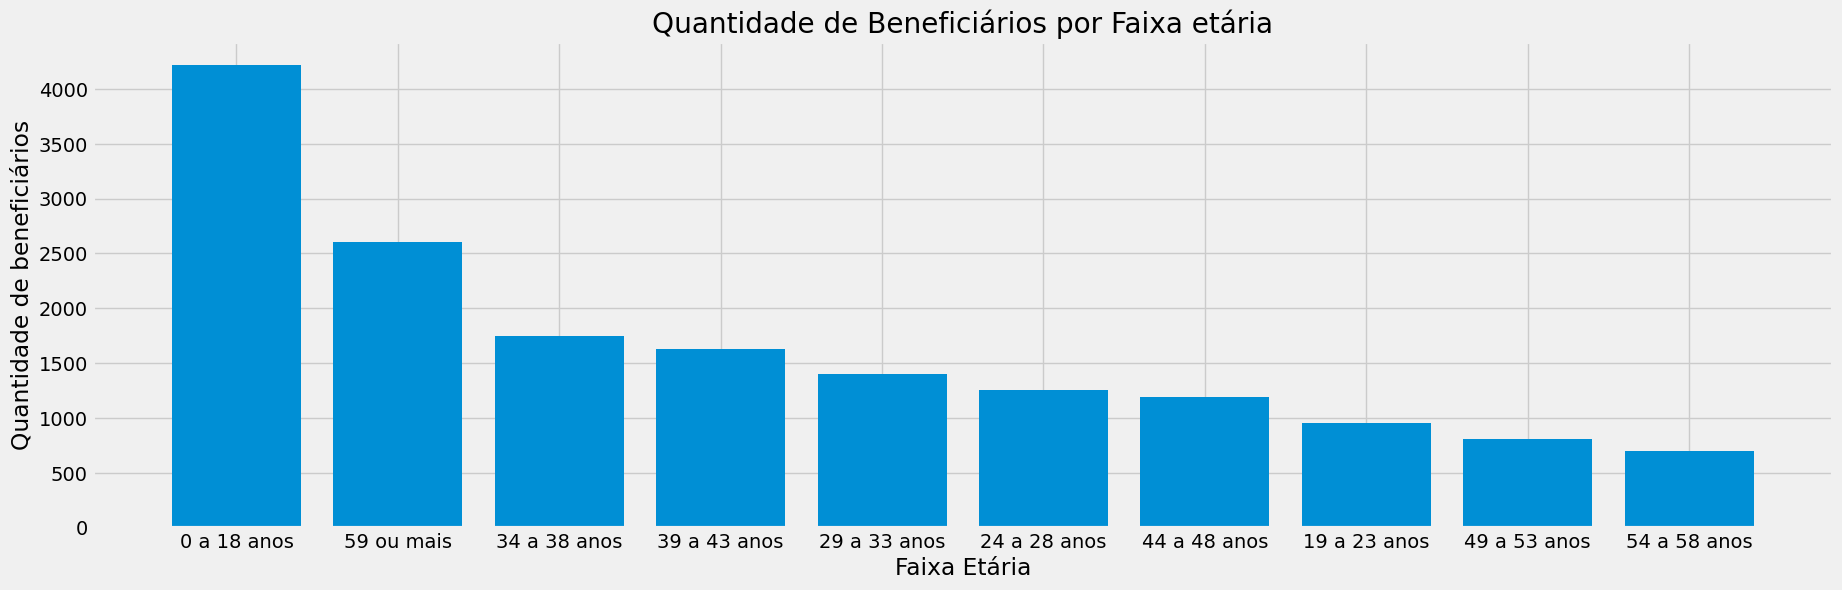

In [153]:
#Quantidade de beneficiários por faixa etária

qt_beneficiario = dados_grafico_qt_beneficiarios.sort_values(by=['id_beneficiario'], ascending=False)
plt.rcParams['figure.figsize'] = [20, 6]
x = qt_beneficiario ['faixa_etaria']
y = qt_beneficiario ['id_beneficiario']
plt.bar(x,y)
plt.ylabel("Quantidade de beneficiários")
plt.xlabel("Faixa Etária")
plt.title("Quantidade de Beneficiários por Faixa etária")
plt.show();





In [154]:
#Fazendo a soma de valores numéricos por faixa etária
dados_grafico_faixa_etaria = df_dados_merge.groupby('faixa_etaria').sum().reset_index()


In [155]:
### Função que gera um gráfico de Faixa etária por tipo de despesa


def grafico_fx_etaria (dados_grafico,dataframe):
    #Ordenando em ordem do maior para o menor
    df_dados = dataframe.sort_values(by=[dados_grafico ], ascending=False)

    fig, ax = plt.subplots(figsize = (16,5))


    x =  df_dados['faixa_etaria']
    y =  df_dados[dados_grafico]

    grafico = ax.bar(x,y, color = 'Teal')
    ax.set_ylabel(f"Despesa {dados_grafico }")
    ax.set_xlabel("Faixa etária")
    ax.set_title(f"Despesa de {dados_grafico} por faixa etária")

    ax.bar_label(grafico, fmt="%.01f", size=10, label_type="edge", )

    plt.show();


### Qual é a faixa etária com maior gasto em consulta?

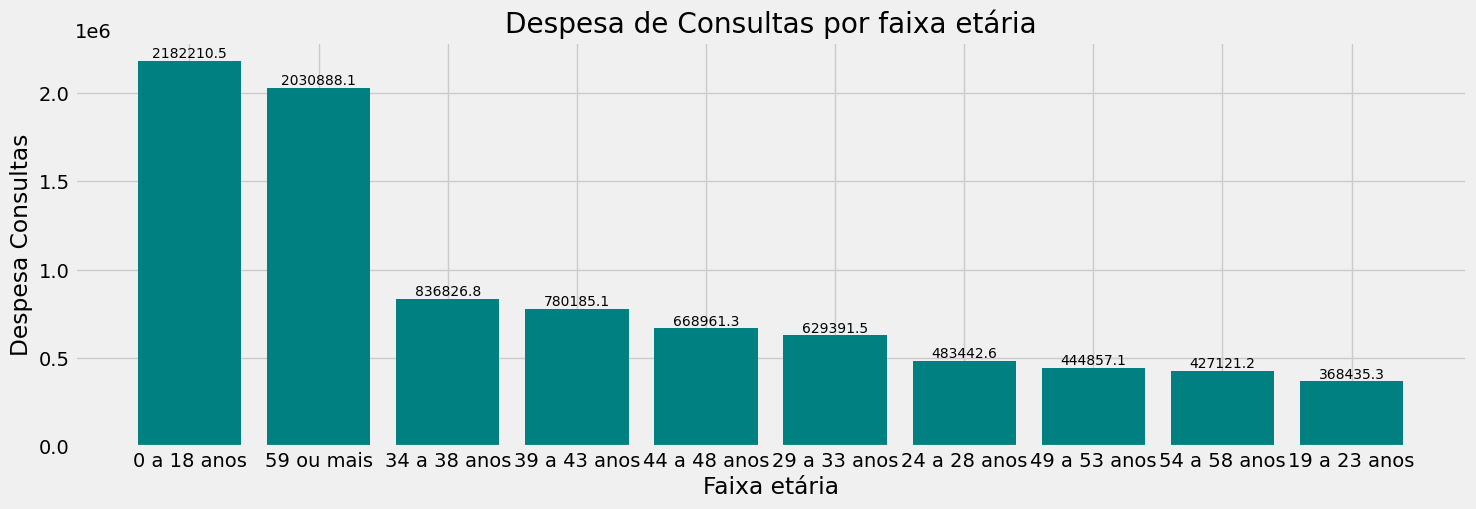

In [156]:
grafico_fx_etaria ('Consultas',dados_grafico_faixa_etaria)


### Qual é a faixa etária com maior gasto em Exames?

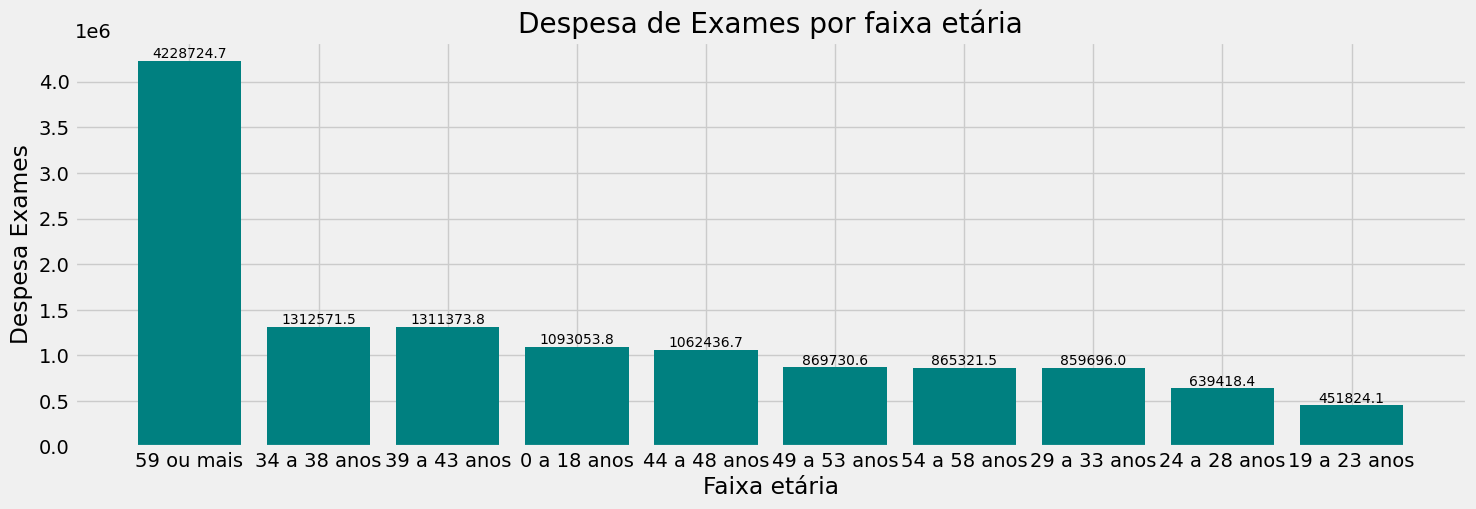

In [157]:
grafico_fx_etaria ('Exames',dados_grafico_faixa_etaria)


### Qual é a faixa etária com maior gasto em Pronto Socorro?

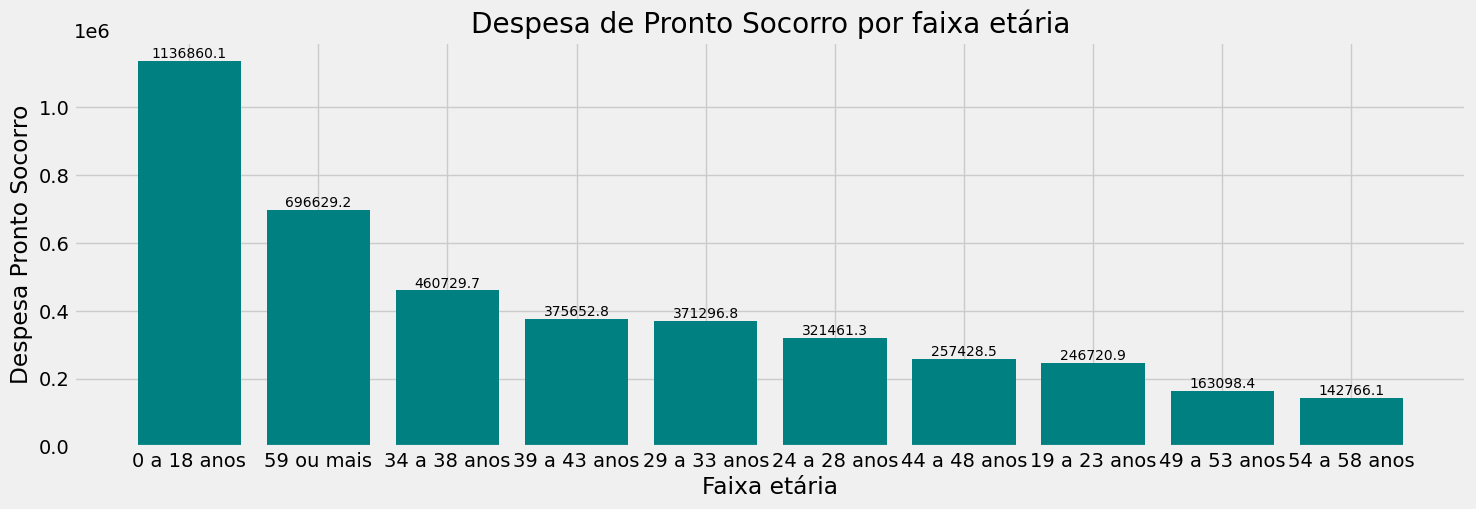

In [158]:
grafico_fx_etaria ('Pronto Socorro',dados_grafico_faixa_etaria)


### Qual é a faixa etária com maior gasto em Internacao?

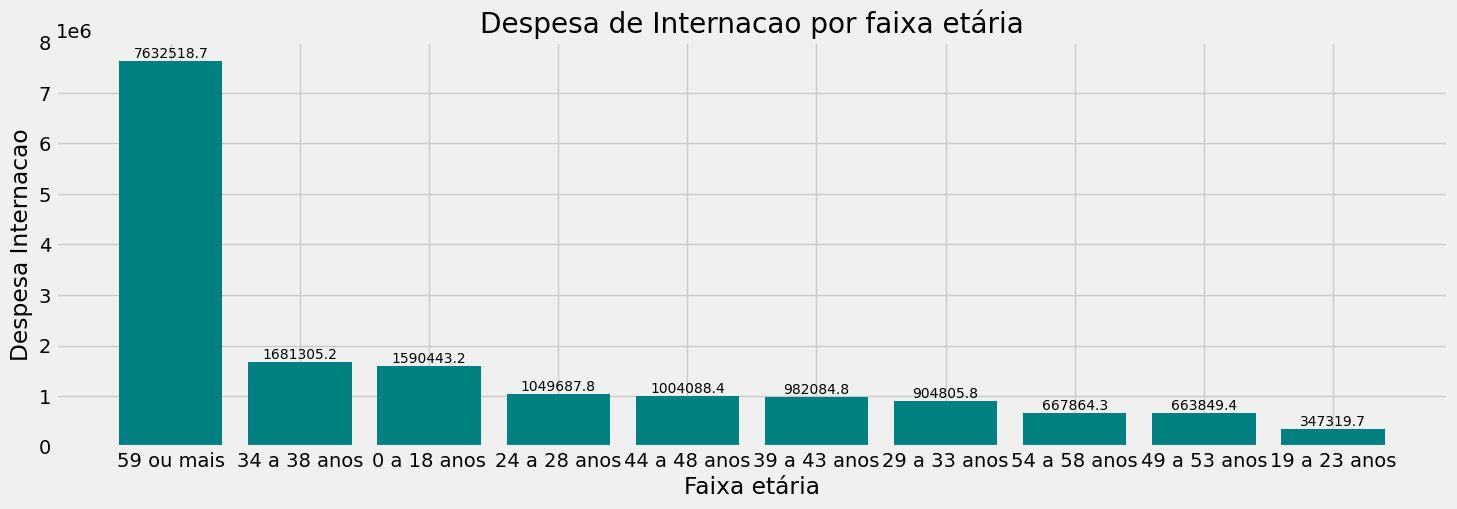

In [159]:
grafico_fx_etaria ('Internacao',dados_grafico_faixa_etaria)


### Qual é a faixa etária com maior gasto em Terapias

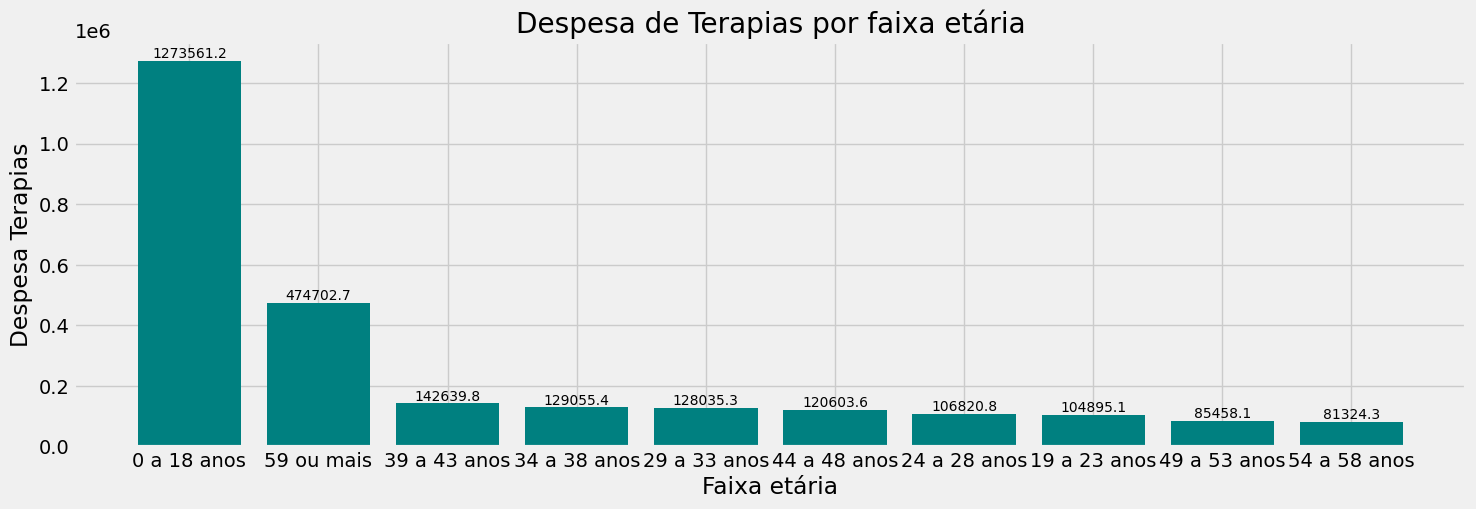

In [160]:
grafico_fx_etaria ('Terapias',dados_grafico_faixa_etaria)

In [161]:
#verificando a correlação dos atributos
correlacao = df_dados_merge.corr(method='pearson')
correlacao.style.background_gradient().set_precision(4).set_properties(**{'font-size': '10pt'})



C:\Users\AENeto\AppData\Local\Temp\ipykernel_11996\2957916802.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlacao.style.background_gradient().set_precision(4).set_properties(**{'font-size': '10pt'})


,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias
id_beneficiario,1.0000,0.0770,0.0462,0.0219,0.0009,0.0544
Consultas,0.0770,1.0000,0.5013,0.1494,0.0724,0.1785
Exames,0.0462,0.5013,1.0000,0.1784,0.1016,0.0906
Internacao,0.0219,0.1494,0.1784,1.0000,0.1014,0.0299
Pronto Socorro,0.0009,0.0724,0.1016,0.1014,1.0000,0.0376
Terapias,0.0544,0.1785,0.0906,0.0299,0.0376,1.0000


# Tratar o dataframe para aplicação do modelo

In [162]:
dataset = df_dados_merge

In [163]:
#Precisa modificar os valores devido a memoria estourar
dataset['Consultas'] = dataset['Consultas'] .astype(np.double)
dataset['Exames'] = dataset['Exames'] .astype(np.double)
dataset['Internacao'] = dataset['Internacao'] .astype(np.double)
dataset['Terapias'] = dataset['Terapias'] .astype(np.double)
dataset['Pronto Socorro'] = dataset['Pronto Socorro'] .astype(np.double)


In [164]:
#Para substituir categóricos em númericos
#from sklearn.preprocessing import LabelEncoder

In [165]:
#Para substituir categóricos em númericos
#Transforma categoricas em numeros

le_co = LabelEncoder()
le_co.fit(dataset['coparticipacao'].drop_duplicates())
dataset['coparticipacao'] = le_co.transform(dataset['coparticipacao'])

le_sx = LabelEncoder()
le_sx.fit(dataset['sexo'].drop_duplicates())
dataset['sexo'] = le_sx.transform(dataset['sexo'])

le_fe = LabelEncoder()
le_fe.fit(dataset['faixa_etaria'].drop_duplicates())
dataset['faixa_etaria'] = le_fe.transform(dataset['faixa_etaria'])



In [166]:
#salvando um dataset final
dados_finais = dataset[['id_beneficiario','faixa_etaria','sexo','coparticipacao','Consultas','Exames', 'Internacao',
       'Pronto Socorro', 'Terapias']]

In [167]:
# Salvando o dataset para aplicar o algoritmo
#Nesse caso vamos desconsiderar a coluna id_beneficiario,
df_modelo = dataset[['faixa_etaria','sexo','coparticipacao','Consultas','Exames', 'Internacao',
       'Pronto Socorro', 'Terapias']]

In [168]:
df_modelo.head()

,faixa_etaria,sexo,coparticipacao,Consultas,Exames,Internacao,Pronto Socorro,Terapias
0,9,0,0,1750.0,15762.60,4843.34,737.65,0.00
1,9,0,0,1630.0,5292.41,778.33,380.44,0.00
2,9,1,0,130.0,737.94,0.00,0.00,0.00
3,9,0,0,0.0,263.82,0.00,0.00,33.49
4,9,1,0,720.0,1326.25,0.00,0.00,0.00


## 4° Criando o modelo k-means

In [169]:
#Biblioteca K-means
from sklearn.cluster import KMeans

In [170]:
# Determinando um range do Hyperparâmetro  "K"  do Kmeans
k_range = range(1,12)
k_range

range(1, 12)

### K-means aplicado ao dataset df_modelo

In [171]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(df_modelo) for k in k_range]

## Número de cluster

### Curva de Elbow - dataset df_modelo

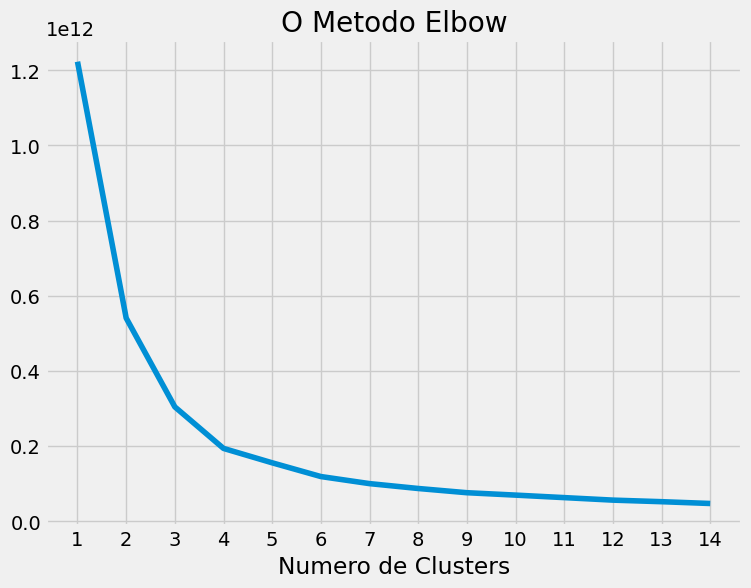

In [172]:
# Curva de Elbow - Verificar o número de cluster
inertia = []

for i in range(1,15):
    kmeans= KMeans(n_clusters= i, random_state=0).fit(df_modelo)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6)) 
plt.plot(range(1,15), inertia)
plt.style.use("fivethirtyeight")
plt.xticks(range(1, 15))
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.show()

### Coeficiente de Silhouette - dataset df_modelo

In [173]:
#Biblioteca para o cálculo do coeficiente silhouette
from sklearn.metrics import silhouette_score


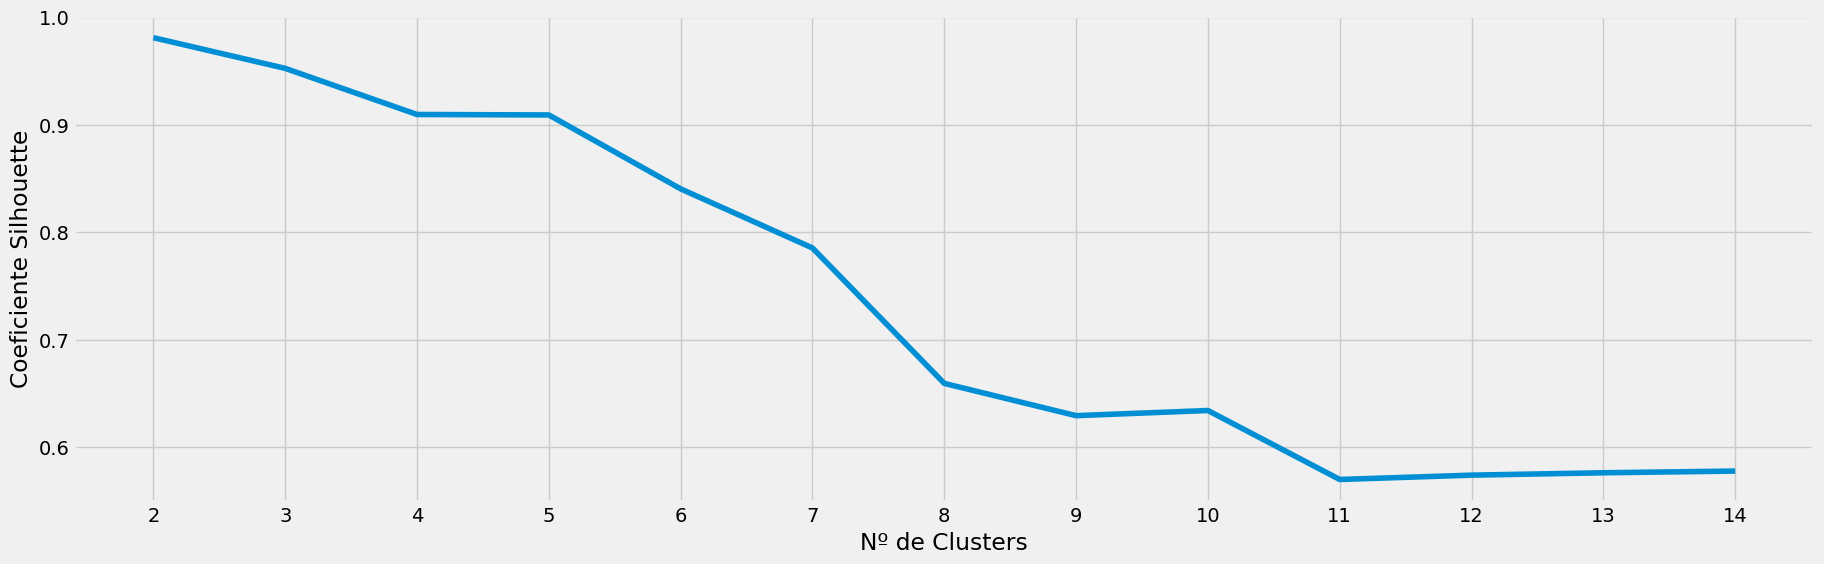

In [174]:
silhouette_coeficients= []


for k in range (2,15):
    kmeans = KMeans(n_clusters = k, random_state = 101)
    kmeans.fit(df_modelo)
    labels = kmeans.labels_
    score = silhouette_score(df_modelo, labels, metric = 'euclidean')
    silhouette_coeficients.append(score)
    

plt.style.use("fivethirtyeight") 
plt.plot(range(2,15), silhouette_coeficients)
plt.xticks(range(2,15))
plt.xlabel("Nº de Clusters")
plt.ylabel("Coeficiente Silhouette")
plt.show()

### Criando o modelo com o número de cluster encontrado

In [175]:
# Criando um modelo com K = 3
modelo_v1 = KMeans(n_clusters = 3)
modelo_v1.fit(df_modelo)

KMeans(n_clusters=3)

In [176]:
#Métrica de avaliação para Clusterização com 3 clusters

silhouette_score

# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(df_modelo, labels, metric = 'euclidean')

0.956360448912274

In [177]:
# Criando um modelo com K = 4
modelo_v2 = KMeans(n_clusters = 4)
modelo_v2.fit(df_modelo)

KMeans(n_clusters=4)

In [178]:
#Métrica de avaliação para Clusterização com 4 clusters

silhouette_score

# Silhouette Score
labels = modelo_v2.labels_
silhouette_score(df_modelo, labels, metric = 'euclidean')

0.9093662430407099

Sabemos agora que com o dataset df_modelo, o cluster ideal é 3, considerando que ao testar com 4 cluster o coeficiente de silhouete apresentou ser menor.

# Verificando o dataset com os clusters classificados

In [179]:
# Lista com nomes das colunas
names = ['id_beneficiario','Consultas','Exames','Internacao','Pronto Socorro','Terapias','faixa_etaria','sexo','coparticipacao']


In [180]:
df_modelo.columns

Index(['faixa_etaria', 'sexo', 'coparticipacao', 'Consultas', 'Exames',
       'Internacao', 'Pronto Socorro', 'Terapias'],
      dtype='object')

In [181]:
# Incluindo o n° do cluster na base de clientes
cluster_map = pd.DataFrame(dados_finais, columns = names)
cluster_map['cluster'] = modelo_v1.labels_

In [182]:
cluster_map

,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias,faixa_etaria,sexo,coparticipacao,cluster
0,1000002,1750.00,15762.60,4843.34,737.65,0.00,9,0,0,0
1,1000003,1630.00,5292.41,778.33,380.44,0.00,9,0,0,0
2,1000004,130.00,737.94,0.00,0.00,0.00,9,1,0,0
3,1000005,0.00,263.82,0.00,0.00,33.49,9,0,0,0
4,1000011,720.00,1326.25,0.00,0.00,0.00,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...
16509,1034572,482.18,0.00,0.00,0.00,0.00,0,1,1,0
16510,1034575,0.00,0.00,0.00,0.00,110.00,0,1,1,0
16511,1034585,260.00,615.15,0.00,0.00,0.00,4,0,1,0
16512,1034587,436.09,32.55,0.00,142.21,0.00,0,1,1,0


In [183]:
# Calcula a média de despesa por cluster
cluster_map.groupby('cluster').mean().reset_index()

,cluster,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias,faixa_etaria,sexo,coparticipacao
0,0,1.017096e+06,525.534748,754.116334,558.267225,248.474249,158.471999,3.898910,0.451860,0.606175
1,1,1.022758e+06,869.261250,4386.233750,278333.177500,1571.503750,436.745000,5.500000,0.625000,0.125000
2,2,1.019697e+06,2535.992118,3243.729059,60352.891765,939.718000,486.278706,6.635294,0.435294,0.470588


In [184]:
#Quantidade de clientes por cluster
qt_beneficiarios_cluster = cluster_map[['id_beneficiario','cluster']].groupby('cluster').count().reset_index()
qt_beneficiarios_cluster

,cluster,id_beneficiario
0,0,16421
1,1,8
2,2,85


PCA

In [185]:
# Reduzindo a dimensionalidade
#from sklearn.decomposition import PCA
# Aplica redução de dimensionalidade no array das variáveis
pca = PCA(n_components = 2).fit_transform(df_modelo)


In [186]:
pca

array([[ 4305.15092368, 13309.39129931],
       [  -70.09223007,  4363.06886435],
       [-1010.72660897,  -226.22805251],
       ...,
       [-1012.11240664,  -273.52948889],
       [-1024.9549754 ,  -687.40583877],
       [-1032.40341966,  -861.34687938]])

In [187]:
# Determinando um range do Hyperparâmetro  "K"  do Kmeans
k_range = range(1,12)
k_range

range(1, 12)

In [188]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

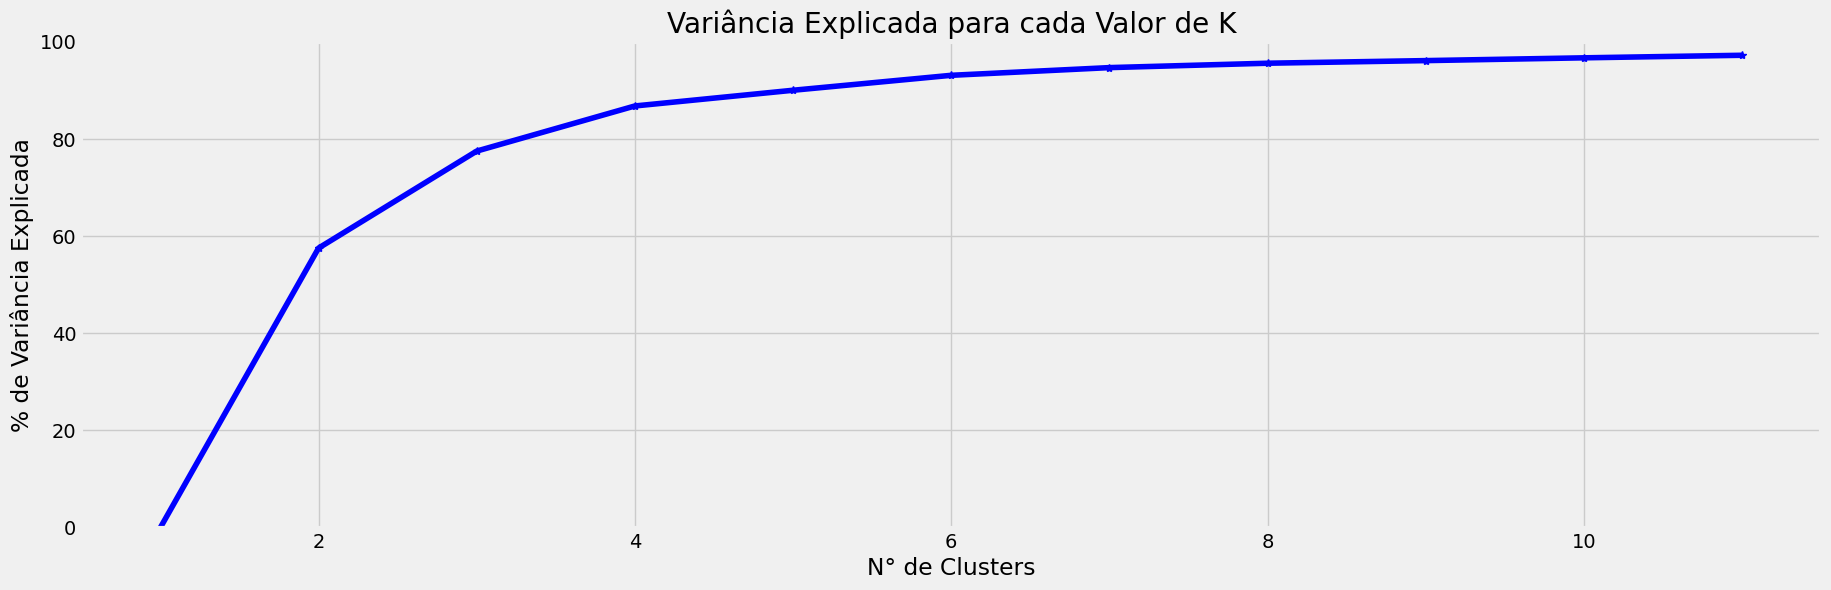

In [189]:

#from scipy.spatial.distance import cdist, pdist
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N° de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')

In [190]:
# Criando um modelo com K = 3
modelo_v4 = KMeans(n_clusters = 3)
modelo_v4.fit(pca)

KMeans(n_clusters=3)

In [191]:
#Métrica de avaliação para Clusterização com 3 clusters - base com PCA.

silhouette_score

# Silhouette Score
labels = modelo_v4.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.9624807681856377

In [192]:
# Criando um modelo com K = 4 utilizando PCA
modelo_v5 = KMeans(n_clusters = 4)
modelo_v5.fit(pca)

KMeans(n_clusters=4)

In [193]:
#Métrica de avaliação para Clusterização com 4 clusters utilizando PCA.

silhouette_score

# Silhouette Score
labels = modelo_v5.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.9244439067227143

In [194]:
# Criando um modelo com K = 5
modelo_v6 = KMeans(n_clusters = 5)
modelo_v6.fit(pca)

KMeans(n_clusters=5)

In [195]:
#Métrica de avaliação para Clusterização com 5 clusters

silhouette_score

# Silhouette Score
labels = modelo_v6.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.9241196219737019

In [196]:
# Incluindo o n° do cluster na base de clientes
cluster_map_pca = pd.DataFrame(dados_finais, columns = names)
cluster_map_pca['cluster'] = modelo_v4.labels_

In [197]:
cluster_map_pca

,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias,faixa_etaria,sexo,coparticipacao,cluster
0,1000002,1750.00,15762.60,4843.34,737.65,0.00,9,0,0,0
1,1000003,1630.00,5292.41,778.33,380.44,0.00,9,0,0,0
2,1000004,130.00,737.94,0.00,0.00,0.00,9,1,0,0
3,1000005,0.00,263.82,0.00,0.00,33.49,9,0,0,0
4,1000011,720.00,1326.25,0.00,0.00,0.00,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...
16509,1034572,482.18,0.00,0.00,0.00,0.00,0,1,1,0
16510,1034575,0.00,0.00,0.00,0.00,110.00,0,1,1,0
16511,1034585,260.00,615.15,0.00,0.00,0.00,4,0,1,0
16512,1034587,436.09,32.55,0.00,142.21,0.00,0,1,1,0


In [198]:
#Quantidade de clientes por cluster
qt_beneficiarios_clusterpca = cluster_map_pca[['id_beneficiario','cluster']].groupby('cluster').count().reset_index()
qt_beneficiarios_clusterpca

,cluster,id_beneficiario
0,0,16421
1,1,85
2,2,8


In [199]:
# Calcula a média de despesa por cluster aplicado ao pca
cluster_map_pca.groupby('cluster').mean().reset_index()

,cluster,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias,faixa_etaria,sexo,coparticipacao
0,0,1.017096e+06,525.534748,754.116334,558.267225,248.474249,158.471999,3.898910,0.451860,0.606175
1,1,1.019697e+06,2535.992118,3243.729059,60352.891765,939.718000,486.278706,6.635294,0.435294,0.470588
2,2,1.022758e+06,869.261250,4386.233750,278333.177500,1571.503750,436.745000,5.500000,0.625000,0.125000


### Finalizando o dataset com os clusters definidos

In [200]:
#Revertendo as variáveis categóricas codificadas com labelencoder, utilizando inverse_transform:

cluster_map['faixa_etaria'] =  le_fe.inverse_transform(cluster_map['faixa_etaria'])
cluster_map['coparticipacao'] =  le_co.inverse_transform(cluster_map['coparticipacao'])
cluster_map['sexo'] =  le_sx.inverse_transform(cluster_map['sexo'])



In [201]:
cluster_map.head()

,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias,faixa_etaria,sexo,coparticipacao,cluster
0,1000002,1750.0,15762.60,4843.34,737.65,0.00,59 ou mais,F,Não,0
1,1000003,1630.0,5292.41,778.33,380.44,0.00,59 ou mais,F,Não,0
2,1000004,130.0,737.94,0.00,0.00,0.00,59 ou mais,M,Não,0
3,1000005,0.0,263.82,0.00,0.00,33.49,59 ou mais,F,Não,0
4,1000011,720.0,1326.25,0.00,0.00,0.00,59 ou mais,M,Não,0


In [202]:
# Calcula a média de despesa por cluster aplicado ao original.
cluster_map.groupby('cluster').mean().reset_index()

,cluster,id_beneficiario,Consultas,Exames,Internacao,Pronto Socorro,Terapias
0,0,1.017096e+06,525.534748,754.116334,558.267225,248.474249,158.471999
1,1,1.022758e+06,869.261250,4386.233750,278333.177500,1571.503750,436.745000
2,2,1.019697e+06,2535.992118,3243.729059,60352.891765,939.718000,486.278706


In [203]:
#Disponibilização do dataset com os clusters definidos da base original

cluster_map.to_excel('Dataset TCC - clusters definidos .xlsx')


### Análise dos clusters

### Cluster 0

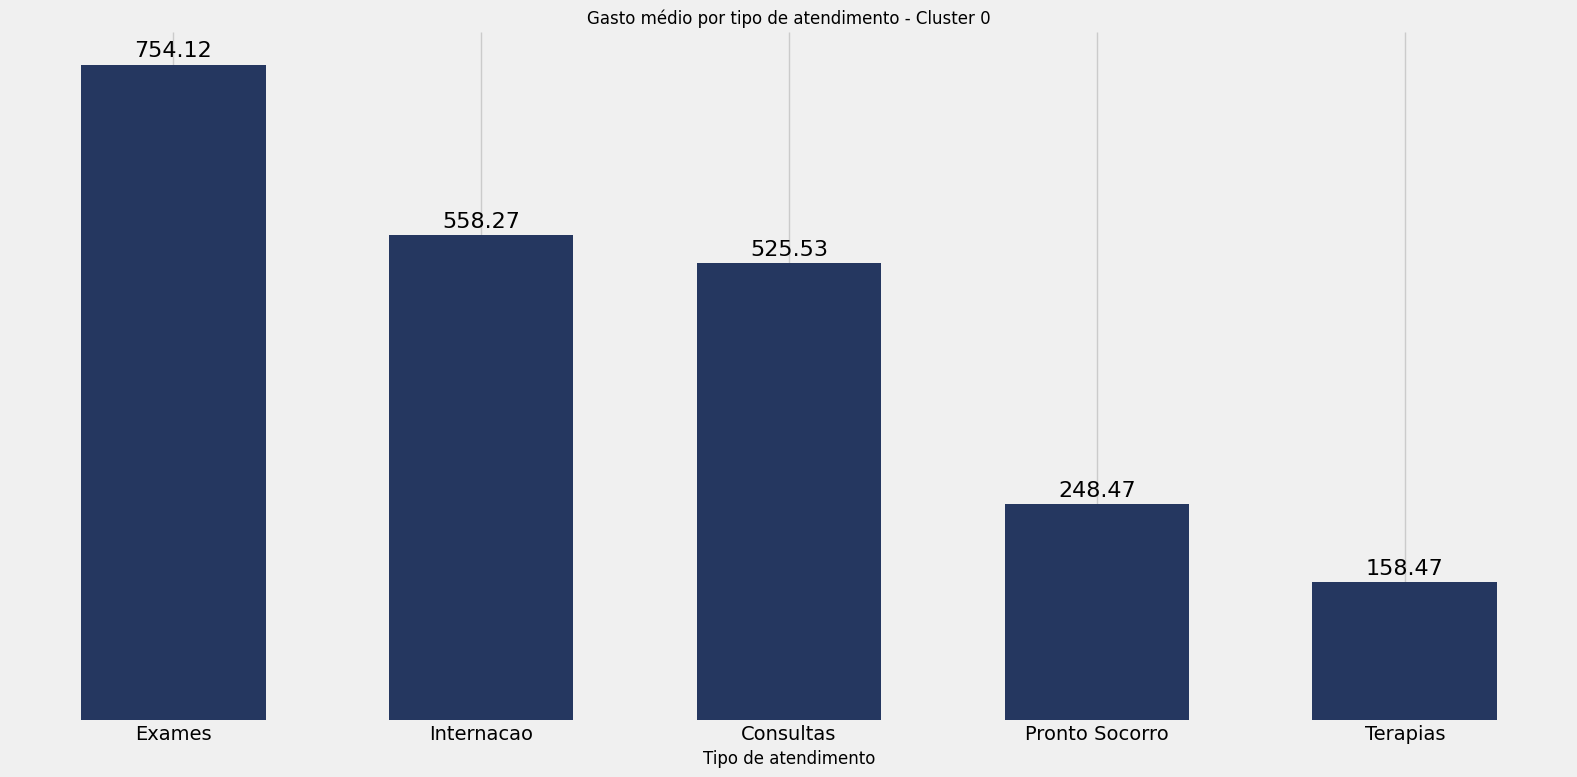

In [204]:
#cluster 0
## Gasto médio por tipo de atendimento

df_grafico_media_cluster = cluster_map.query("cluster==0").groupby('cluster').mean().reset_index()
df_grafico_media_cluster = df_grafico_media_cluster[['Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_media_cluster= pd.melt(df_grafico_media_cluster.reset_index(), var_name='tipo', value_name='valor')

#retirar os index
df_grafico_media_cluster = df_grafico_media_cluster[df_grafico_media_cluster.tipo.str.contains("index") == False]


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_cluster.sort_values('valor', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['tipo'], df_dados['valor'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento - Cluster 0", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

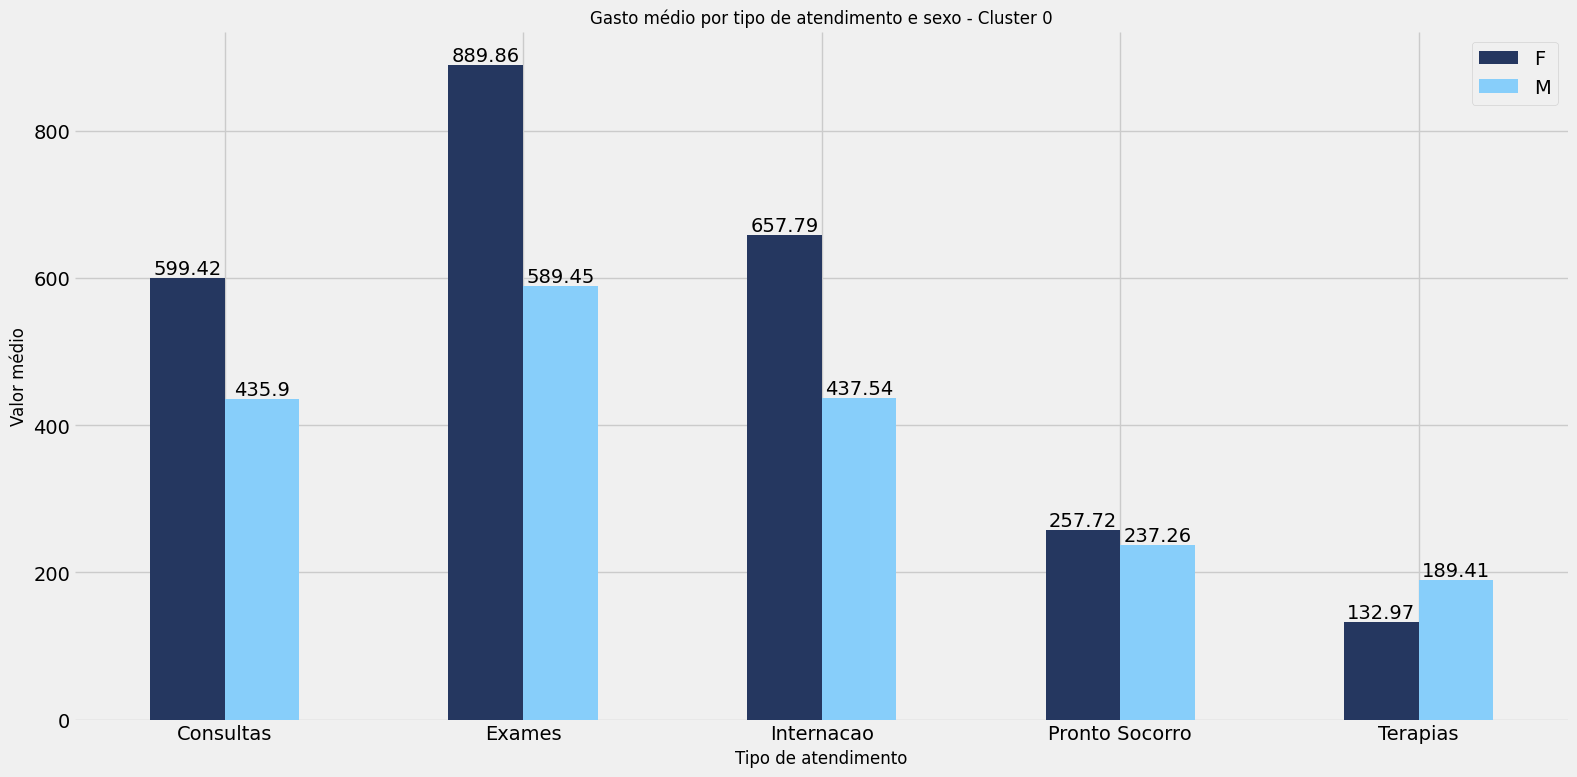

In [205]:
#Média de valor por atributo e sexo

#cluster 0

df_grafico_atributo_sexo = cluster_map.query("cluster==0").groupby('sexo').mean().reset_index()

df_grafico_atributo_sexo = df_grafico_atributo_sexo[['sexo','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]

df_grafico_atributo_sexo  = pd.melt(df_grafico_atributo_sexo.reset_index(), id_vars=['sexo'], 
var_name='tipo', value_name='valor')
#retirar os index
df_grafico_atributo_sexo= df_grafico_atributo_sexo[df_grafico_atributo_sexo.tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_sexo.pivot(index='tipo', columns='sexo', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e sexo - Cluster 0", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str))
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()


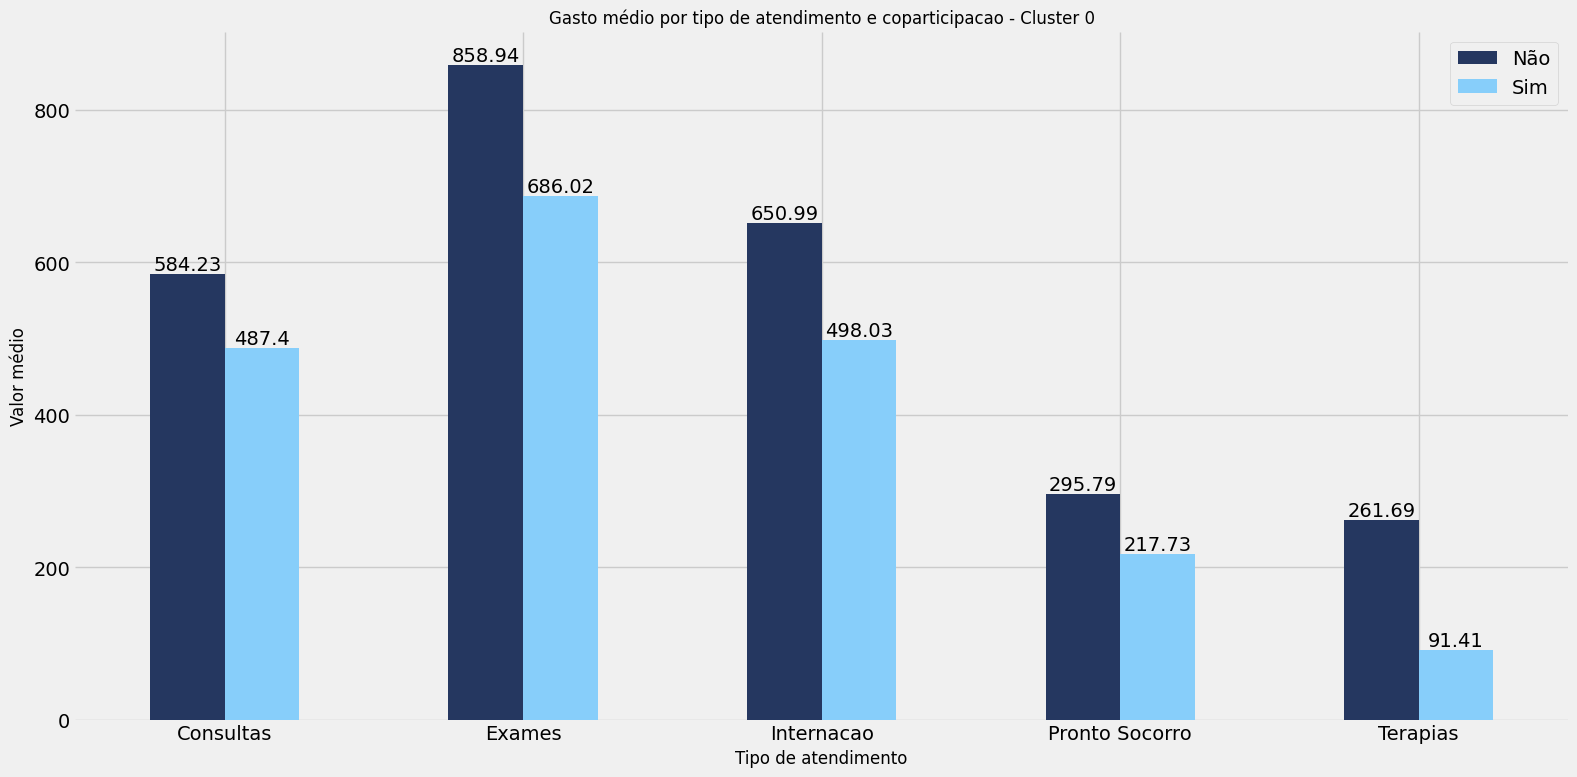

In [206]:
#Média de valor por tipo de atendimento e coparticipação

#cluster 0

df_grafico_atributo_coparticipacao = cluster_map.query("cluster==0").groupby('coparticipacao').mean().reset_index()

df_grafico_atributo_coparticipacao = df_grafico_atributo_coparticipacao[['coparticipacao','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_atributo_coparticipacao  = pd.melt(df_grafico_atributo_coparticipacao.reset_index(), id_vars=['coparticipacao'], 
var_name='tipo', value_name='valor')

#retirar os index
df_grafico_atributo_coparticipacao  = df_grafico_atributo_coparticipacao [df_grafico_atributo_coparticipacao .tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_coparticipacao.pivot(index='tipo', columns='coparticipacao', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e coparticipacao - Cluster 0", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str))
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

C:\Users\AENeto\AppData\Local\Temp\ipykernel_11996\2695554176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']


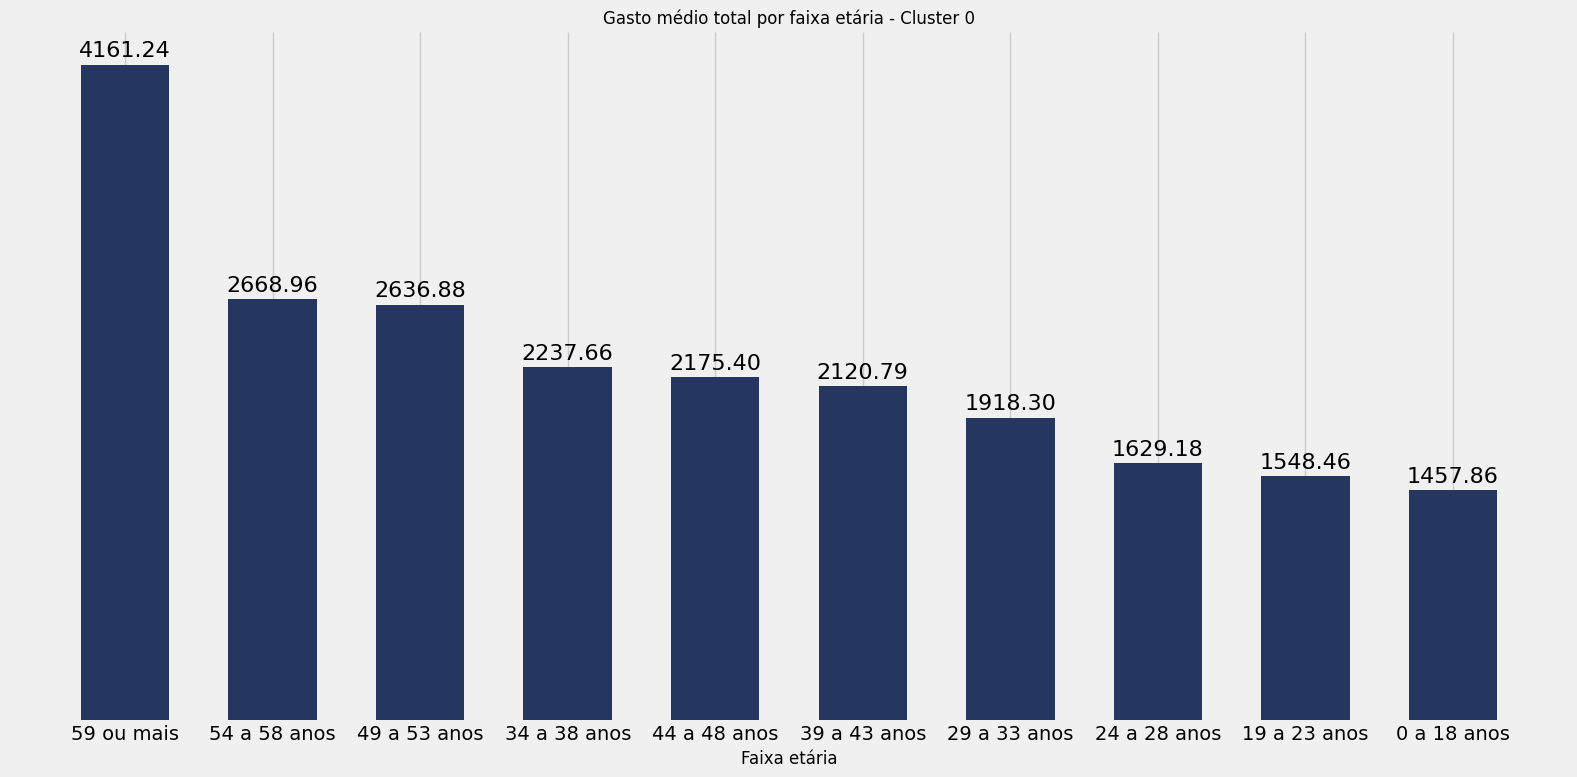

In [207]:
#cluster 0
## Gasto médio total por faixa etária



df_grafico_media_faixa = cluster_map.query("cluster==0")

df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']

df_grafico_media_faixa = df_grafico_media_faixa[['faixa_etaria','total']] 

#df_grafico_media_faixa = pd.melt(df_grafico_media_faixa.reset_index(),id_vars=['faixa_etaria'], var_name='tipo', value_name='valor')

#df_grafico_media_faixa = df_grafico_media_faixa[df_grafico_media_faixa.tipo.str.contains("index") == False]

df_grafico_media_faixa= df_grafico_media_faixa[['faixa_etaria','total']].groupby('faixa_etaria').mean().reset_index()


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_faixa.sort_values('total', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['faixa_etaria'], df_dados['total'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Faixa etária", fontsize=12)
ax.set_title("Gasto médio total por faixa etária - Cluster 0", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

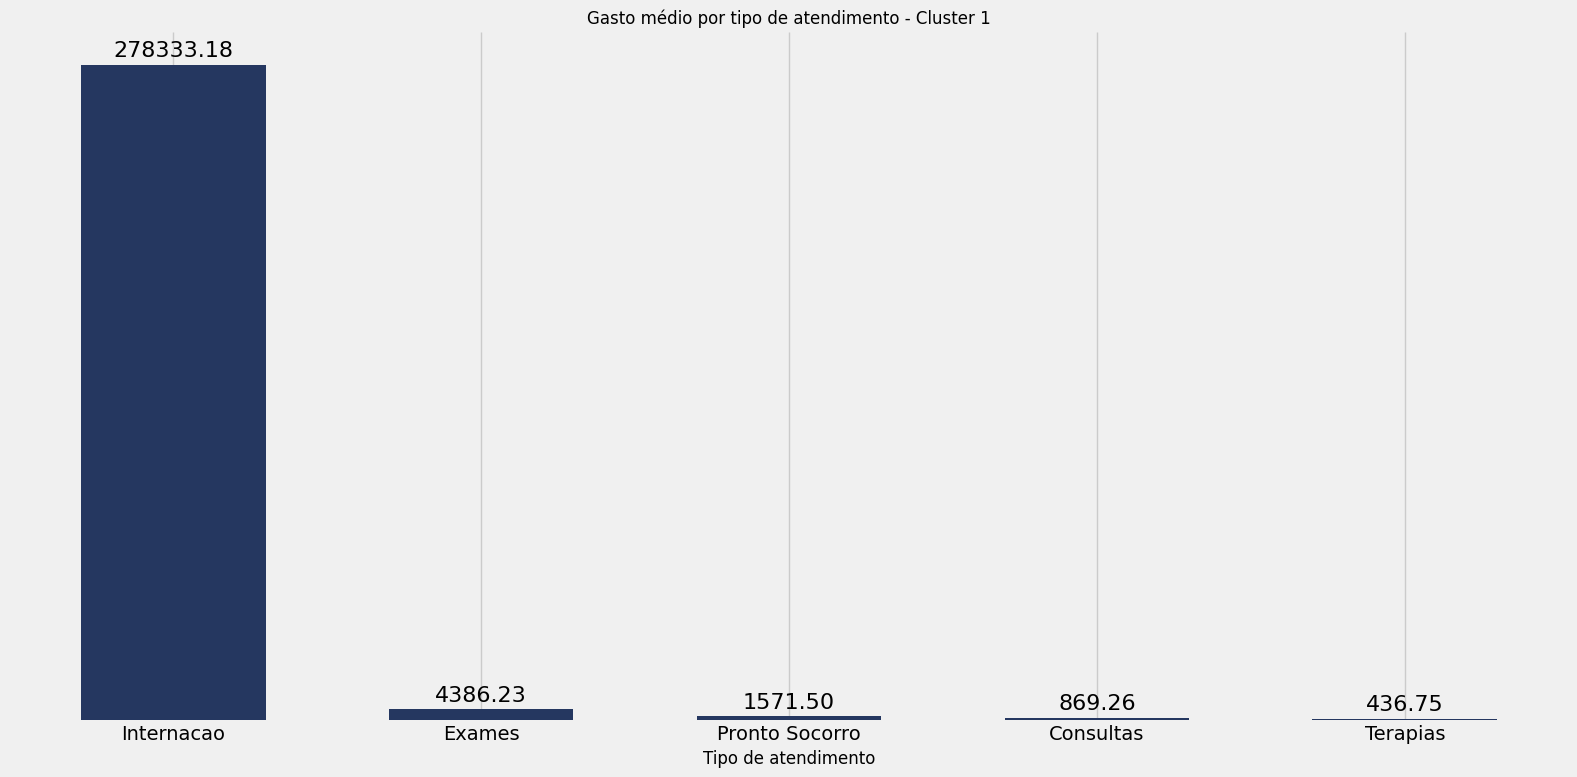

In [208]:
#cluster 1
## Gasto médio por tipo de atendimento

df_grafico_media_cluster = cluster_map.query("cluster==1").groupby('cluster').mean().reset_index()
df_grafico_media_cluster = df_grafico_media_cluster[['Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_media_cluster= pd.melt(df_grafico_media_cluster.reset_index(), var_name='tipo', value_name='valor')


#retirar os index
df_grafico_media_cluster = df_grafico_media_cluster[df_grafico_media_cluster.tipo.str.contains("index") == False]


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_cluster.sort_values('valor', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['tipo'], df_dados['valor'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento - Cluster 1", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

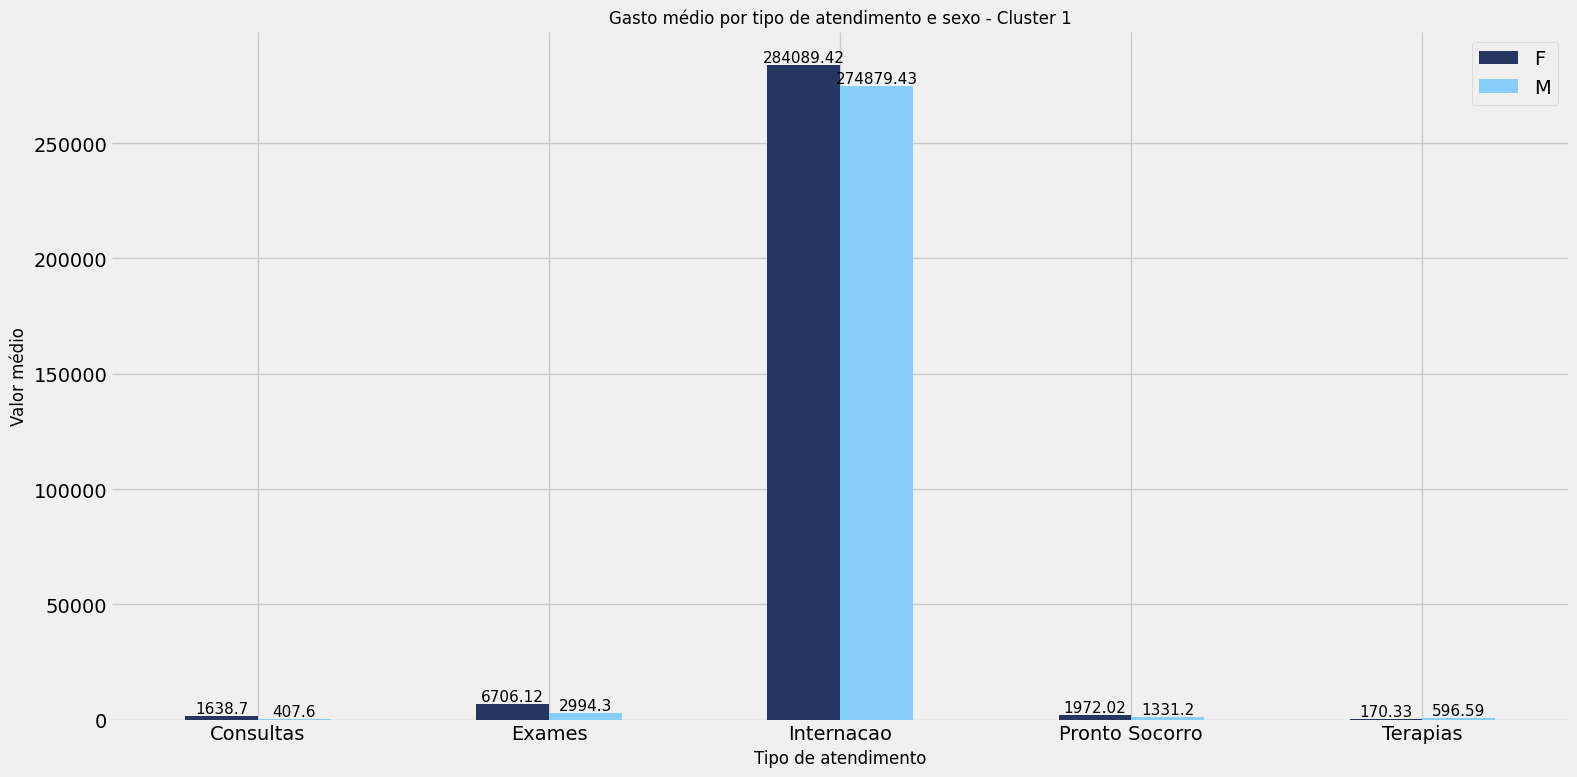

In [209]:
#Média de valor por atributo e sexo

#cluster 1

df_grafico_atributo_sexo = cluster_map.query("cluster==1").groupby('sexo').mean().reset_index()

df_grafico_atributo_sexo = df_grafico_atributo_sexo[['sexo','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]

df_grafico_atributo_sexo  = pd.melt(df_grafico_atributo_sexo.reset_index(), id_vars=['sexo'], 
var_name='tipo', value_name='valor')
#retirar os index
df_grafico_atributo_sexo= df_grafico_atributo_sexo[df_grafico_atributo_sexo.tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_sexo.pivot(index='tipo', columns='sexo', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e sexo - Cluster 1", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str), fontsize=11)
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()


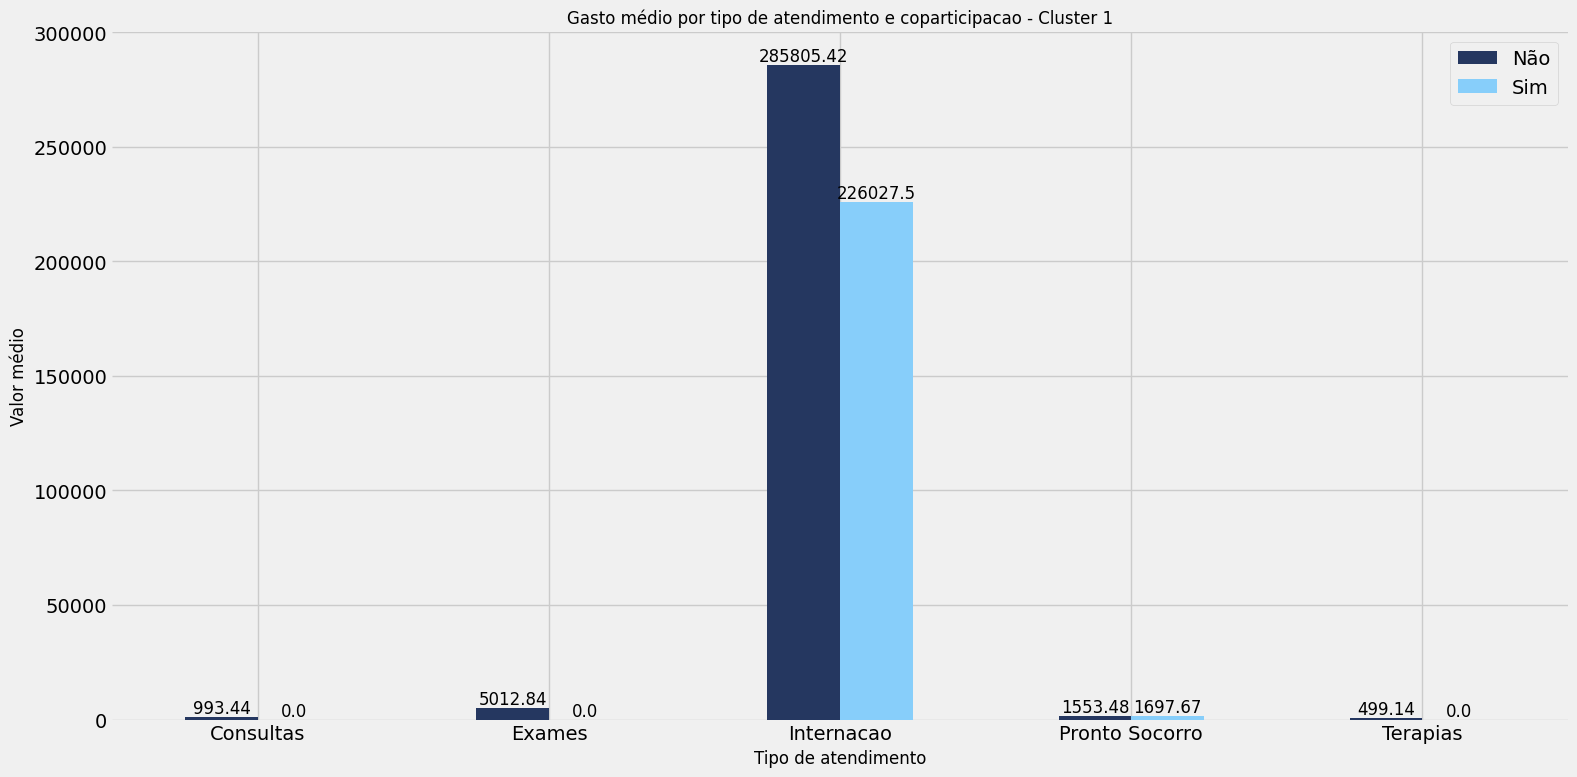

In [210]:
#Média de valor por tipo de atendimento e coparticipação

#cluster 1

df_grafico_atributo_coparticipacao = cluster_map.query("cluster==1").groupby('coparticipacao').mean().reset_index()

df_grafico_atributo_coparticipacao = df_grafico_atributo_coparticipacao[['coparticipacao','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_atributo_coparticipacao  = pd.melt(df_grafico_atributo_coparticipacao.reset_index(), id_vars=['coparticipacao'], 
var_name='tipo', value_name='valor')

#retirar os index
df_grafico_atributo_coparticipacao  = df_grafico_atributo_coparticipacao [df_grafico_atributo_coparticipacao .tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_coparticipacao.pivot(index='tipo', columns='coparticipacao', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e coparticipacao - Cluster 1", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str),fontsize=12)
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

C:\Users\AENeto\AppData\Local\Temp\ipykernel_11996\4241076500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']


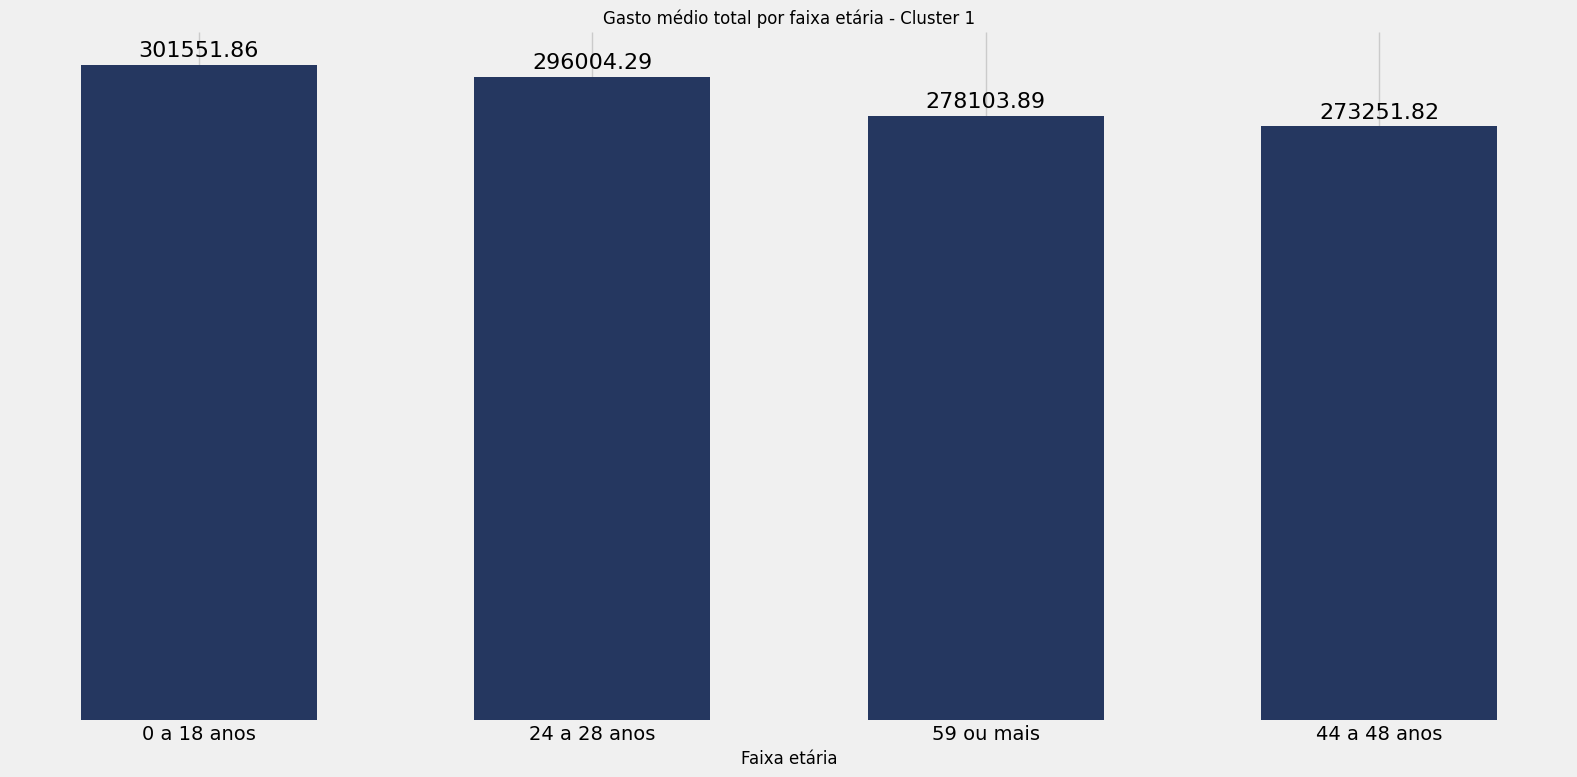

In [211]:
#cluster 1
## Gasto médio total por faixa etária



df_grafico_media_faixa = cluster_map.query("cluster==1")

df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']

df_grafico_media_faixa = df_grafico_media_faixa[['faixa_etaria','total']] 

#df_grafico_media_faixa = pd.melt(df_grafico_media_faixa.reset_index(),id_vars=['faixa_etaria'], var_name='tipo', value_name='valor')

#df_grafico_media_faixa = df_grafico_media_faixa[df_grafico_media_faixa.tipo.str.contains("index") == False]

df_grafico_media_faixa= df_grafico_media_faixa[['faixa_etaria','total']].groupby('faixa_etaria').mean().reset_index()


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_faixa.sort_values('total', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['faixa_etaria'], df_dados['total'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Faixa etária", fontsize=12)
ax.set_title("Gasto médio total por faixa etária - Cluster 1", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

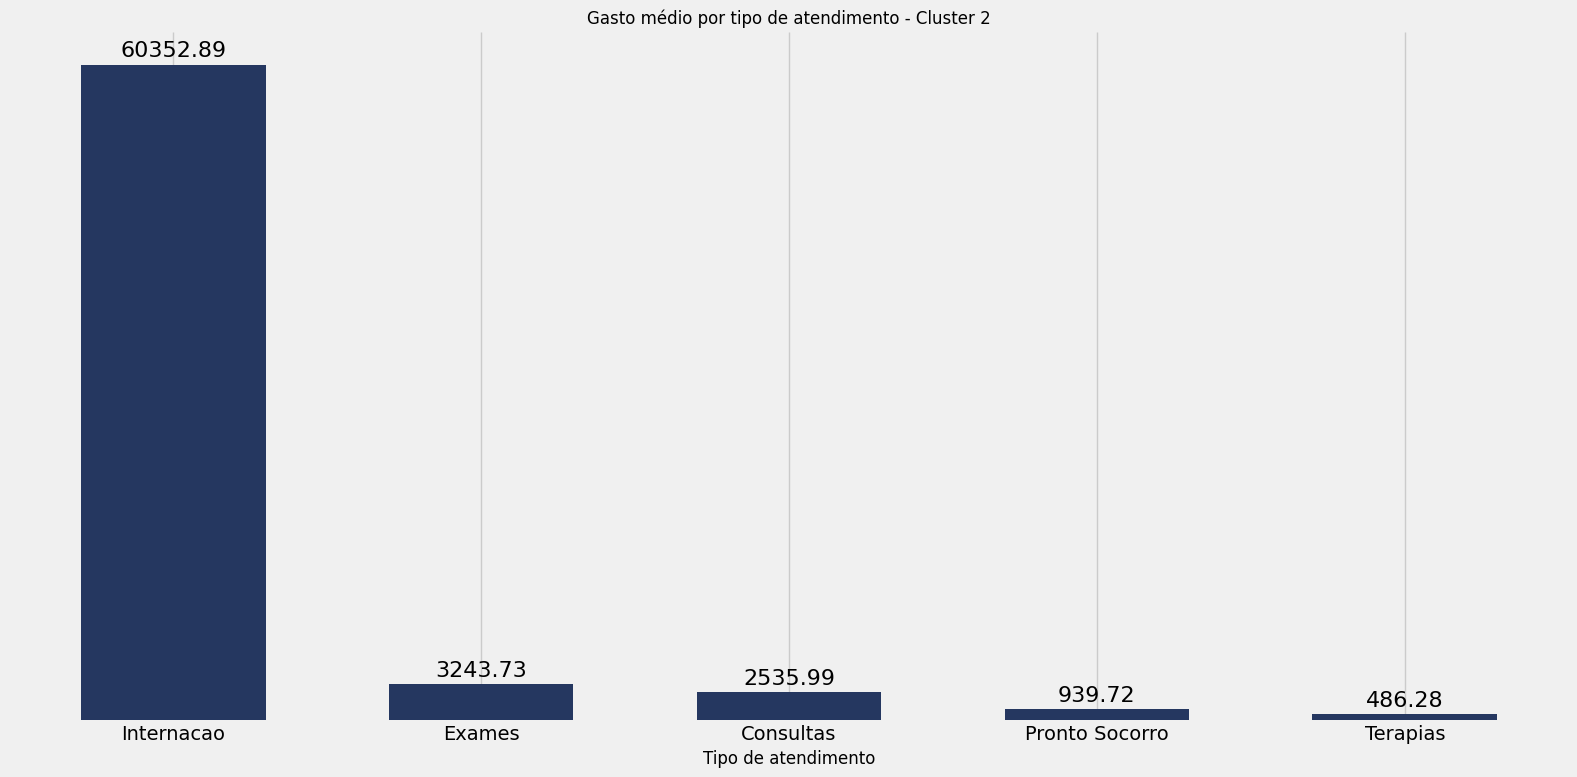

In [212]:
#cluster 2
## Gasto médio por tipo de atendimento

df_grafico_media_cluster = cluster_map.query("cluster==2").groupby('cluster').mean().reset_index()
df_grafico_media_cluster = df_grafico_media_cluster[['Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_media_cluster= pd.melt(df_grafico_media_cluster.reset_index(), var_name='tipo', value_name='valor')

#retirar os index
df_grafico_media_cluster = df_grafico_media_cluster[df_grafico_media_cluster.tipo.str.contains("index") == False]


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_cluster.sort_values('valor', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['tipo'], df_dados['valor'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento - Cluster 2", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

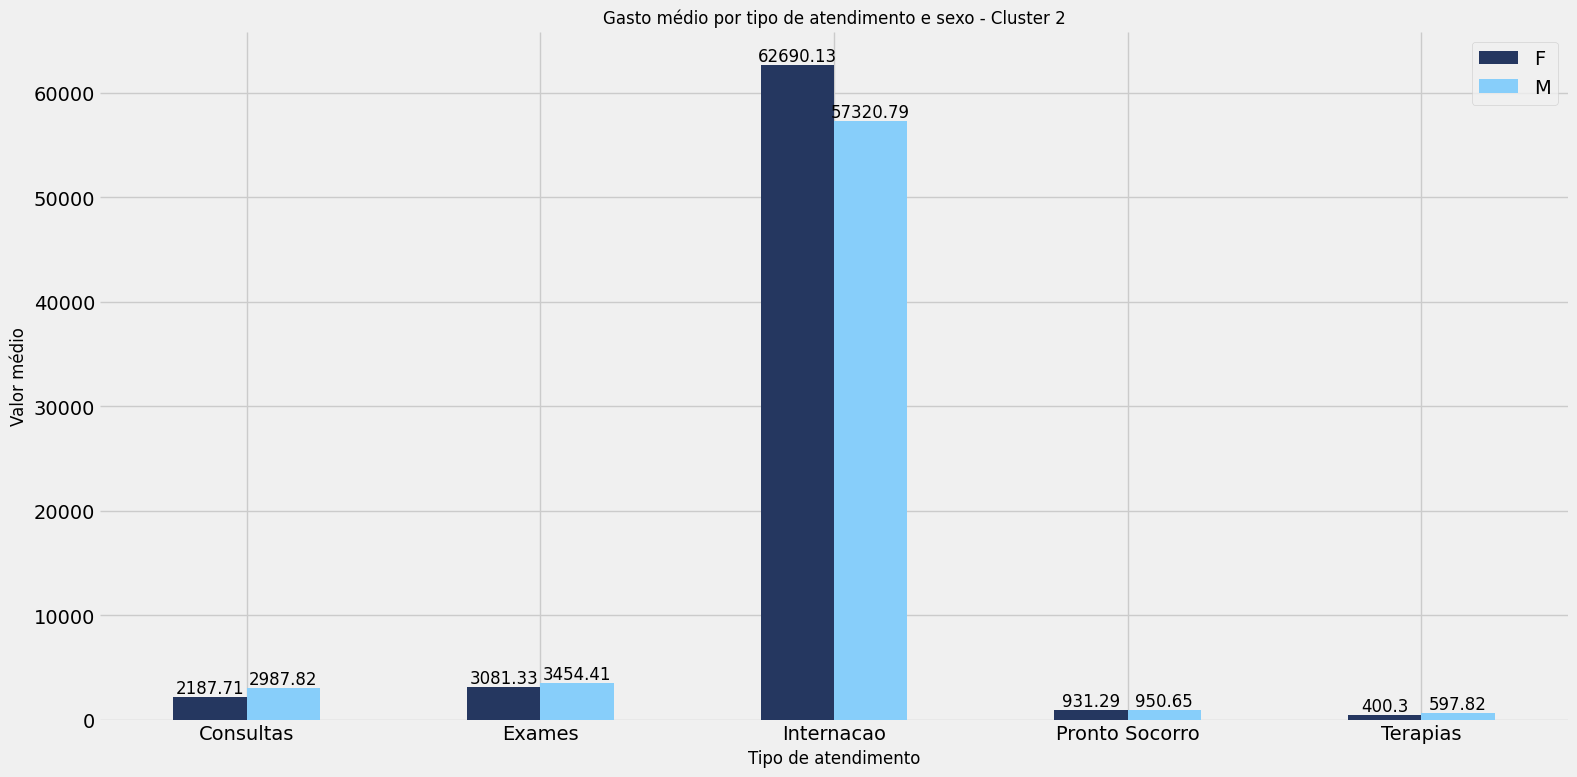

In [213]:
#Média de valor por atributo e sexo

#cluster 2

df_grafico_atributo_sexo = cluster_map.query("cluster==2").groupby('sexo').mean().reset_index()

df_grafico_atributo_sexo = df_grafico_atributo_sexo[['sexo','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]

df_grafico_atributo_sexo  = pd.melt(df_grafico_atributo_sexo.reset_index(), id_vars=['sexo'], 
var_name='tipo', value_name='valor')
#retirar os index
df_grafico_atributo_sexo= df_grafico_atributo_sexo[df_grafico_atributo_sexo.tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_sexo.pivot(index='tipo', columns='sexo', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e sexo - Cluster 2", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str), fontsize=12)
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()


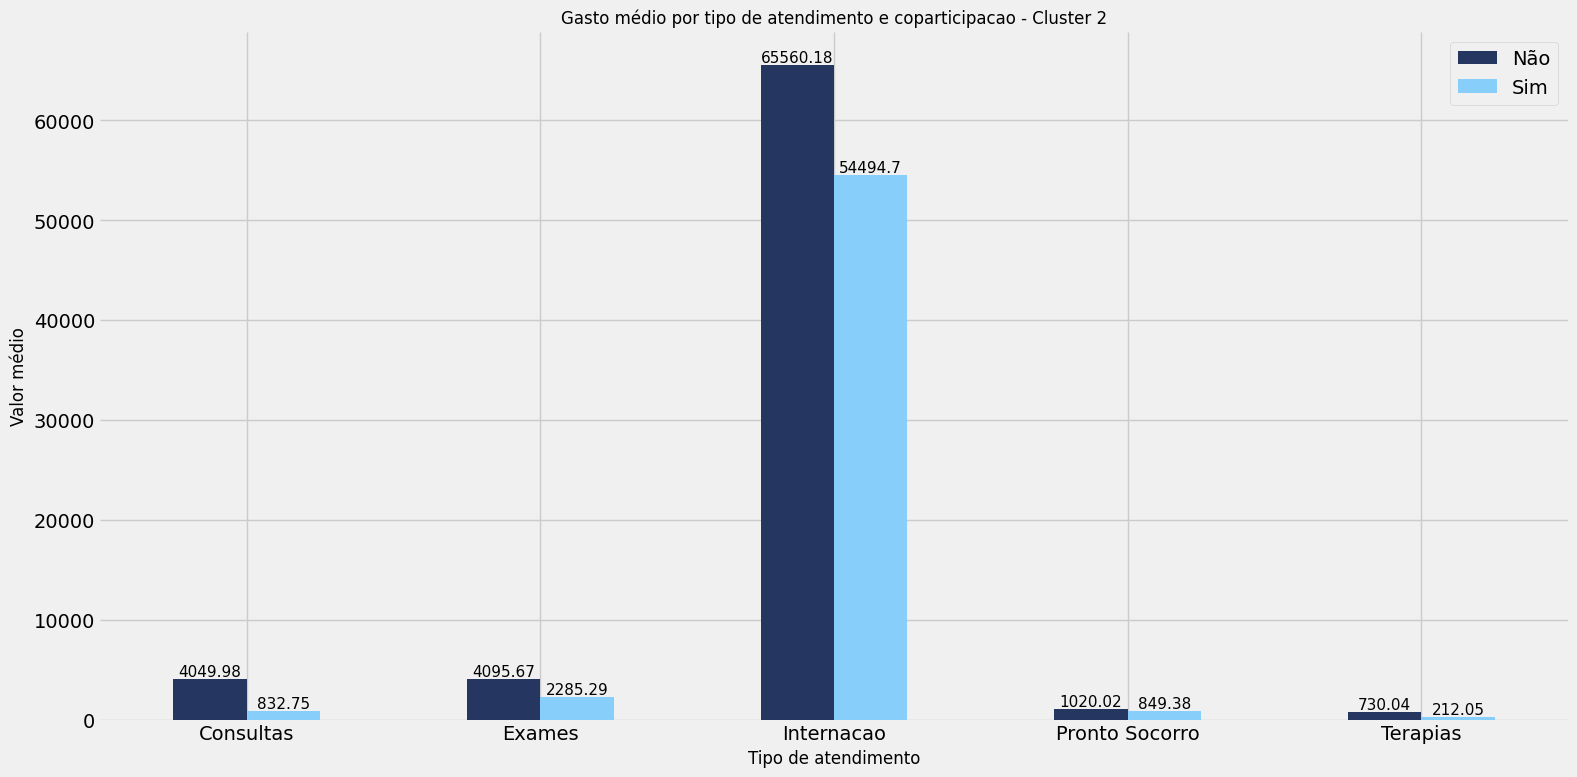

In [214]:
#Média de valor por tipo de atendimento e coparticipação

#cluster 2

df_grafico_atributo_coparticipacao = cluster_map.query("cluster==2").groupby('coparticipacao').mean().reset_index()

df_grafico_atributo_coparticipacao = df_grafico_atributo_coparticipacao[['coparticipacao','Consultas','Exames','Internacao','Pronto Socorro','Terapias']]
df_grafico_atributo_coparticipacao  = pd.melt(df_grafico_atributo_coparticipacao.reset_index(), id_vars=['coparticipacao'], 
var_name='tipo', value_name='valor')

#retirar os index
df_grafico_atributo_coparticipacao  = df_grafico_atributo_coparticipacao [df_grafico_atributo_coparticipacao .tipo.str.contains("index") == False]


# Pivotando os dados por tipo de atendimento e por sexo
df_pivot = df_grafico_atributo_coparticipacao.pivot(index='tipo', columns='coparticipacao', values='valor')

azul_escuro = '#253760'
azul_claro = '#87CEFA'
width = 0.3  # largura das barras


# Criar o gráfico de barras com largura personalizada
ax = df_pivot.plot(kind='bar', rot=0, figsize=(16,8),
                   color=[azul_escuro, azul_claro], 

                   linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Tipo de atendimento", fontsize=12)
ax.set_ylabel("Valor médio", fontsize=12)
ax.set_title("Gasto médio por tipo de atendimento e coparticipacao - Cluster 2", fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionando rótulos de valor nas barras
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=df_pivot.iloc[:,i].round(2).astype(str),fontsize=11)
    
# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

C:\Users\AENeto\AppData\Local\Temp\ipykernel_11996\3221121903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']


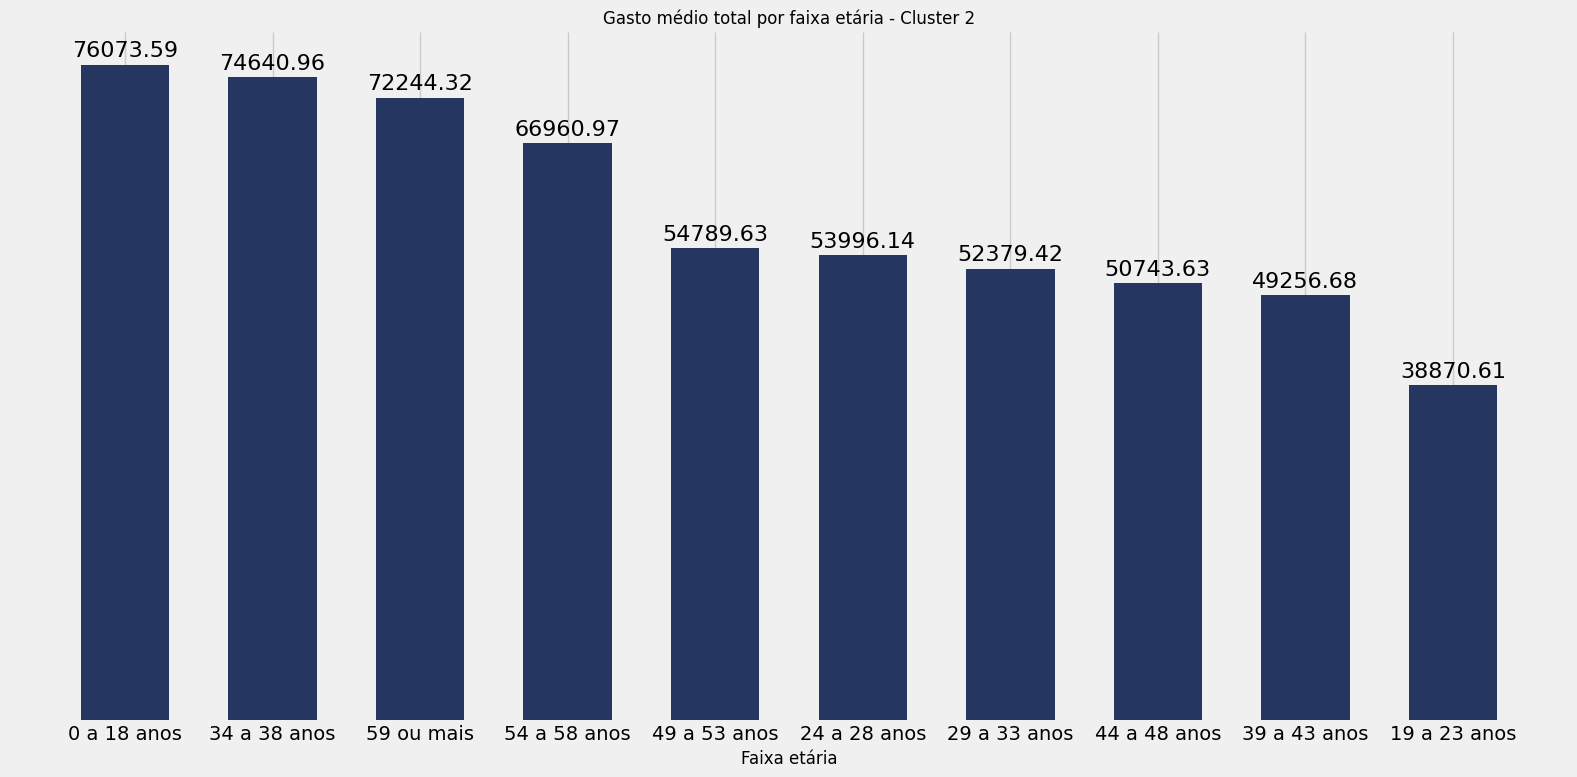

In [215]:
#cluster 2
## Gasto médio total por faixa etária



df_grafico_media_faixa = cluster_map.query("cluster==2")

df_grafico_media_faixa ['total']= df_grafico_media_faixa['Consultas'] + df_grafico_media_faixa['Exames'] + df_grafico_media_faixa['Internacao'] + df_grafico_media_faixa['Pronto Socorro'] + df_grafico_media_faixa['Terapias']

df_grafico_media_faixa = df_grafico_media_faixa[['faixa_etaria','total']] 

#df_grafico_media_faixa = pd.melt(df_grafico_media_faixa.reset_index(),id_vars=['faixa_etaria'], var_name='tipo', value_name='valor')

#df_grafico_media_faixa = df_grafico_media_faixa[df_grafico_media_faixa.tipo.str.contains("index") == False]

df_grafico_media_faixa= df_grafico_media_faixa[['faixa_etaria','total']].groupby('faixa_etaria').mean().reset_index()


# Definir cor
azul_escuro = '#253760'

# Ordenar os dados em ordem decrescente
df_dados = df_grafico_media_faixa.sort_values('total', ascending=False)

# Criar o gráfico de barras com largura personalizada
fig, ax = plt.subplots(figsize=(16, 8))
grafico = ax.bar(df_dados['faixa_etaria'], df_dados['total'], color=azul_escuro, width=0.6)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar títulos e labels
ax.set_xlabel("Faixa etária", fontsize=12)
ax.set_title("Gasto médio total por faixa etária - Cluster 2", fontsize=12)

# Adicionar rótulos de valores nas barras
for rect in grafico:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=16)

# Ajustar o espaço em branco ao redor do gráfico
plt.tight_layout()

plt.show()

### Fim